# Задание 9-10: Эволюционные алгоритмы оптимизации
*Выполнено студенткой группы ИММО-01-25 Чан Минь Ханг*

## А. Изучение эволюционных алгоритмов оптимизации
1. Генетический алгоритм (https://pypi.org/project/geneticalgorithm/). 
2. Алгоритм роя частиц (https://pypi.org/project/pyswarm/). 
3. Алгоритм муравья (https://pypi.org/project/PyACO/). 
4. Пчелиный алгоритм (https://pypi.org/project/bees-algorithm/). 
5. Алгоритм дифференциальной эволюции (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html). 
6. Алгоритм клонального отбора. 
7. Алгоритм косяка рыб. 
8. Алгоритм кукушки. 
9. Бактериальный алгоритм. 
10. Алгоритм светлячков. 
11. Сорняковый алгоритм. 
12. Обезьяний алгоритм. 
13. Алгоритм прыгающих лягушек. 
14. Алгоритм летучих мышей. 
15. Алгоритм растущих деревьев. 
16. Алгоритм поиска гармонии. 
17. Алгоритм гравитационного поиска. 
18. Электромагнитный алгоритм. 
19. Алгоритм эволюции разума. 
20. Диффузный алгоритм. 
21. Культурный алгоритм.

По факту – их очень много. И их число постоянно растет.


In [185]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.optimize import minimize, differential_evolution
from geneticalgorithm import geneticalgorithm as ga

import time

import seaborn as sns
from matplotlib import cm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## B. Оптимизация многоэкстремальной функции
Решить задачу оптимизации многоэкстремальной функции, используя классический алгоритм оптимизации (например, алгоритм Ньютона) и эволюционный алгоритм. 

1. Выполнить для каждого из 2 алгоритмов по 100 прогонов, вычислить среднее и дисперсию для финального значения функции соответствия (целевой функции) алгоритма оптимизации. Для эволюционных алгоритмов подобрать такие значения параметров, при которых значение дисперсии минимально. 
2. Оценить время, требуемое для получения априори известного значения глобального экстремума оптимизируемой функции при условии, что завершение работы эволюционного алгоритма осуществляется при достижении значения глобального экстремума. 
3. Для эволюционных алгоритмов оценить время нахождения последнего (возможно, локального) экстремума функции соответствия (целевой функции) при условии, что завершение работы алгоритма осуществляется при достижении максимального числа поколений. Вычислить среднее и дисперсию для времени нахождения последнего локального экстремума функции соответствия (целевой функции). Вычислить среднее и дисперсию для последнего локального экстремума функции соответствия (целевой функции). 
4. Выполнить визуализацию: 
    - для оптимизируемой функции (в трехмерном пространстве); 
    - для значений функции соответствия (целевой функции) в зависимости от числа поколений в случае использования эволюционного алгоритма. 
5. Представить в табличном виде результаты расчетов для среднего и дисперсии по значению функции соответствия (целевой функции) и по времени.

Тестовые функции для оптимизации: 
https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8

In [241]:
def ackley(x, y):
    part1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
    part2 = -np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    part3 = np.exp(1) + 20
    return part1 + part2 + part3

def ackley_2d(vars):
    x, y = vars
    return ackley(x, y)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

global_min = ackley(0, 0)

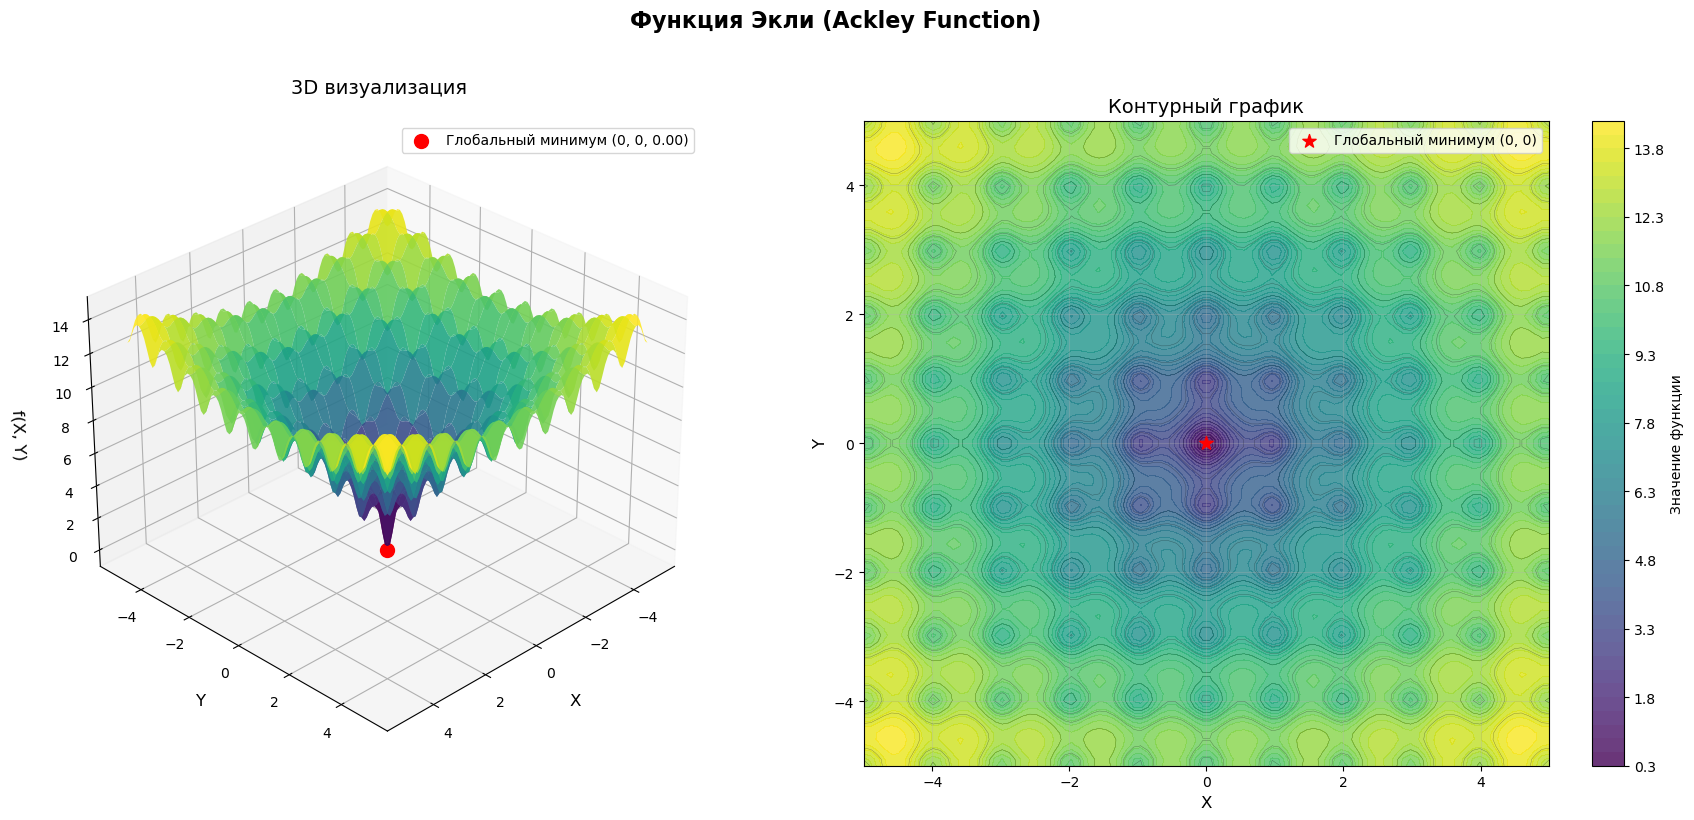

In [216]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, 
                        linewidth=0.1, antialiased=True, rstride=5, cstride=5)

ax1.scatter(0, 0, global_min, color='red', s=100, 
           label=f'Глобальный минимум (0, 0, {global_min:.2f})', zorder=5)

ax1.set_xlabel('X', fontsize=12, labelpad=10)
ax1.set_ylabel('Y', fontsize=12, labelpad=10)
ax1.set_zlabel('f(X, Y)', fontsize=12, labelpad=10)
ax1.set_title('3D визуализация', fontsize=14, pad=20)
ax1.legend(loc='upper right')
# fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10, label='Значение функции')
ax1.view_init(elev=30, azim=45)

ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)
ax2.contour(X, Y, Z, levels=20, colors='black', linewidths=0.25, alpha=0.5)
ax2.scatter(0, 0, color='red', s=100, marker='*', 
           label=f'Глобальный минимум (0, 0)', zorder=5)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_title('Контурный график', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
fig.colorbar(contour, ax=ax2, label='Значение функции')

plt.suptitle('Функция Экли (Ackley Function)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


 The best solution found:                                                                           
 [0.00364207 0.00016889]

 Objective function:
 0.010666332590286931


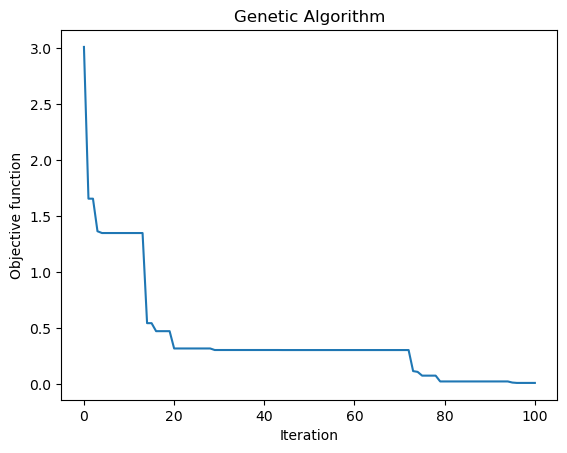

 The best solution found:                                                                           
 [ 0.00375414 -0.04384459]

 Objective function:
 0.17521753150113684


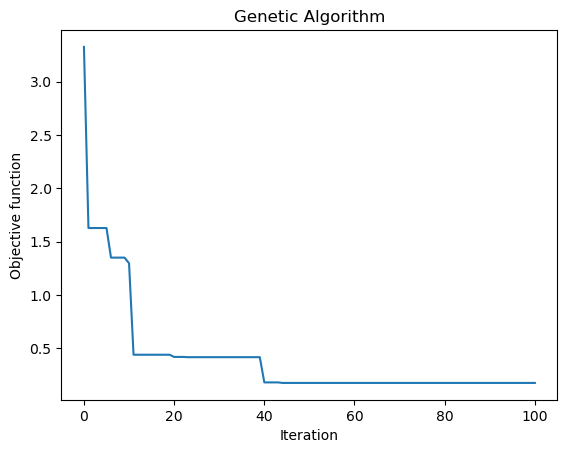

 The best solution found:                                                                           
 [0.0019462  0.01126719]

 Objective function:
 0.03581800771967325


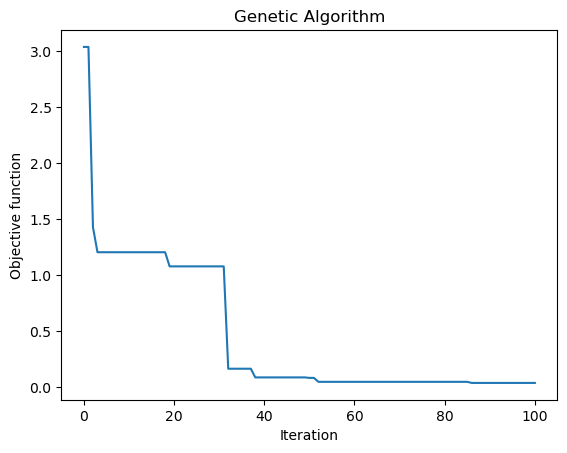

 The best solution found:                                                                           
 [-0.01708754  0.00011564]

 Objective function:
 0.05608864508250777


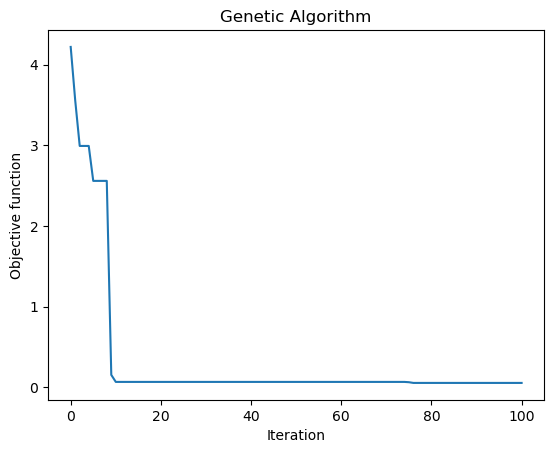

 The best solution found:                                                                           
 [ 0.0157387  -0.01571884]

 Objective function:
 0.07604749893460339


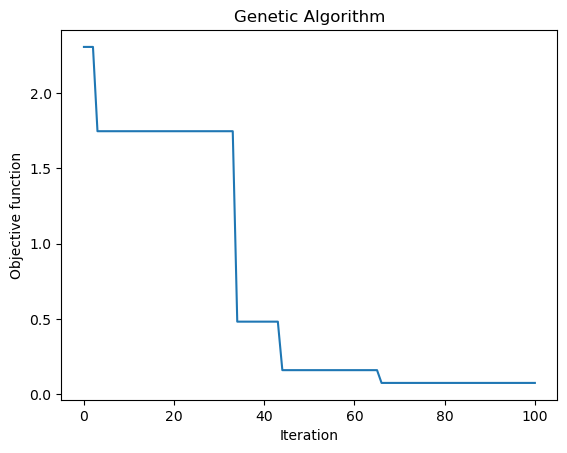

 The best solution found:                                                                           
 [0.00909606 0.00011493]

 Objective function:
 0.027931626197667203


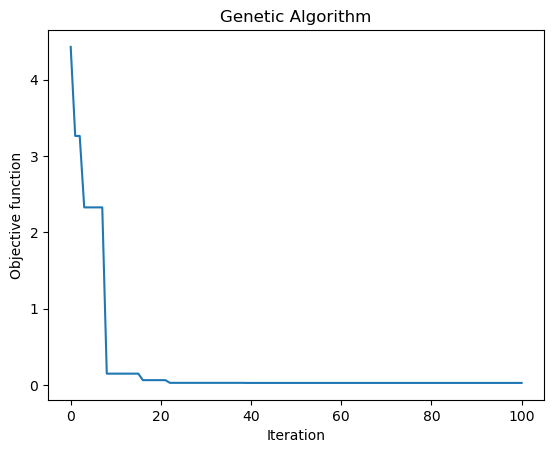

 The best solution found:                                                                           
 [-0.01193294  0.01105684]

 Objective function:
 0.05304777392596138


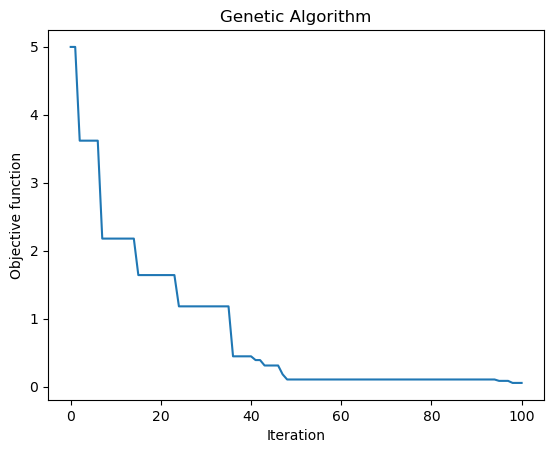

 The best solution found:                                                                           
 [ 0.0006453  -0.02840994]

 Objective function:
 0.10173679755877219


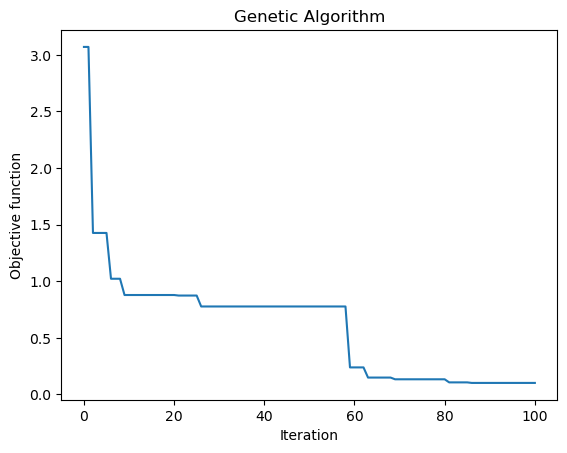

 The best solution found:                                                                           
 [-0.00156527 -0.01203773]

 Objective function:
 0.038253635699828425


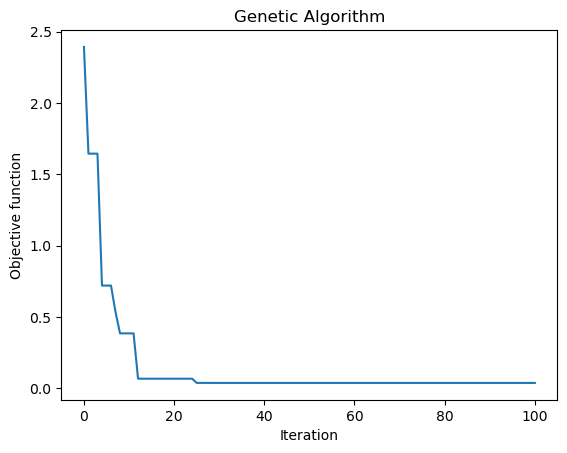

 The best solution found:                                                                           
 [0.00029442 0.00953508]

 Objective function:
 0.02940363073364738


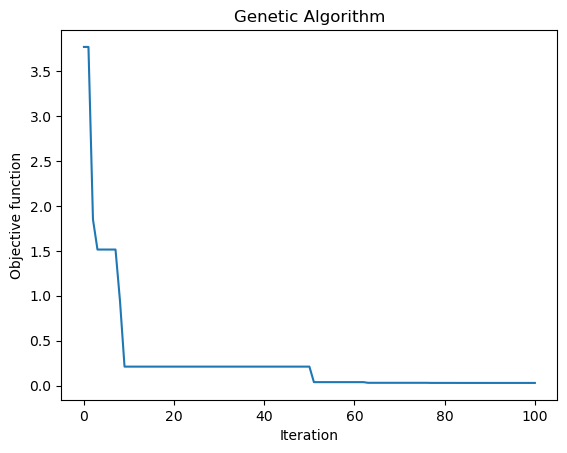

 The best solution found:                                                                           
 [ 0.01832019 -0.00103596]

 Objective function:
 0.0608411107258644


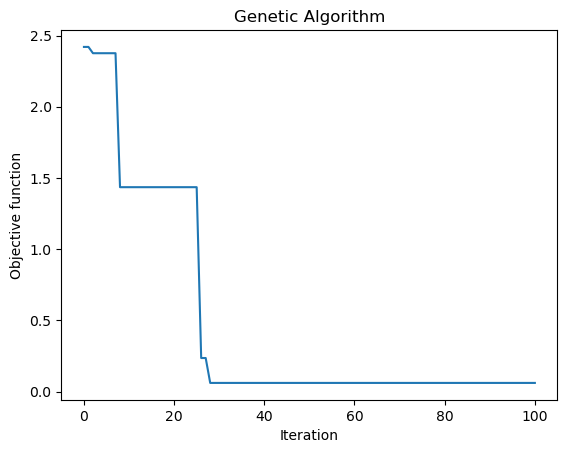

 The best solution found:                                                                           
 [-0.00328366  0.00585451]

 Objective function:
 0.020185269303273135


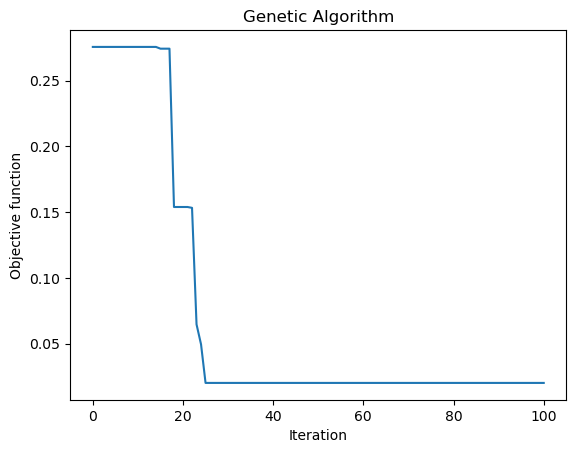

 The best solution found:                                                                           
 [0.00565099 0.02321895]

 Objective function:
 0.08272783274263107


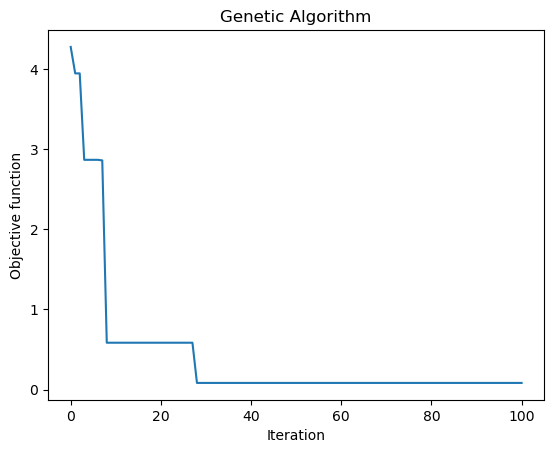

 The best solution found:                                                                           
 [-0.00297233  0.00200688]

 Objective function:
 0.010486380844352272


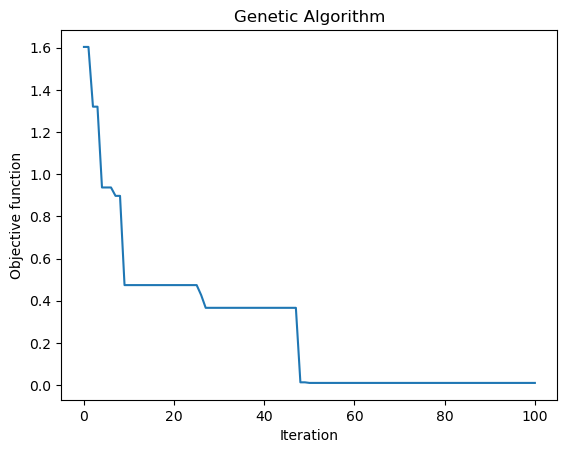

 The best solution found:                                                                           
 [-0.00296253 -0.00030956]

 Objective function:
 0.008661163119235926


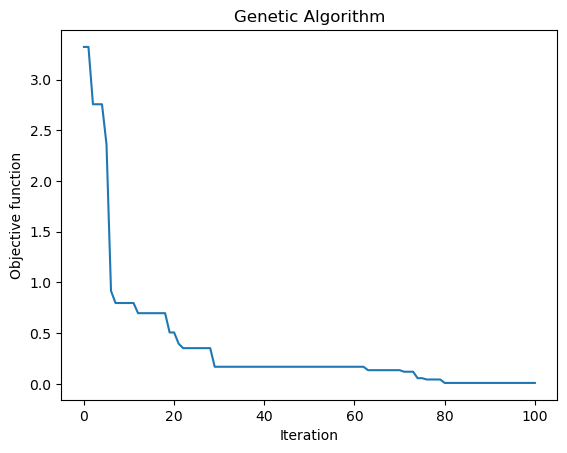

 The best solution found:                                                                           
 [7.59163258e-04 8.99831162e-05]

 Objective function:
 0.0021778310689026803


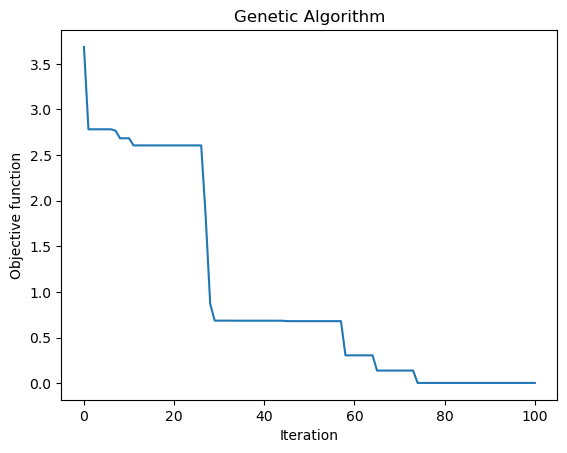

 The best solution found:                                                                           
 [-0.00129555  0.00117842]

 Objective function:
 0.005035150140696221


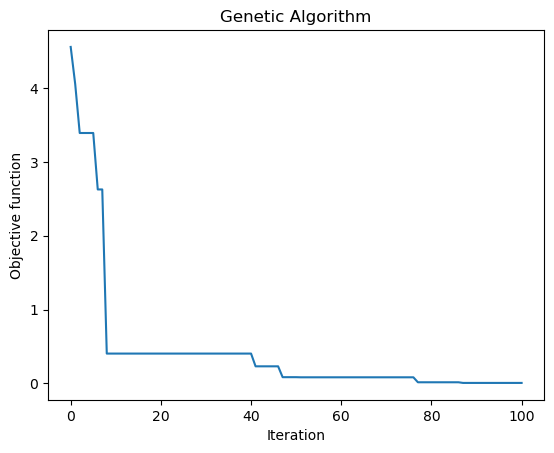

 The best solution found:                                                                           
 [ 0.00103924 -0.00395128]

 Objective function:
 0.012000427104375877


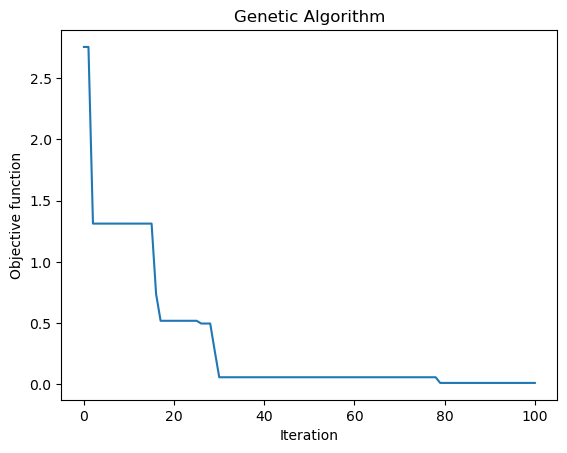

 The best solution found:                                                                           
 [ 1.78866570e-03 -1.44332266e-05]

 Objective function:
 0.005144471416504093


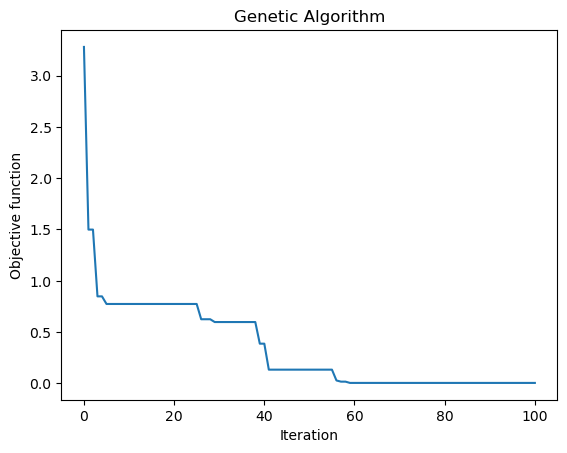

 The best solution found:                                                                           
 [ 0.00845516 -0.00335809]

 Objective function:
 0.027934507455271262


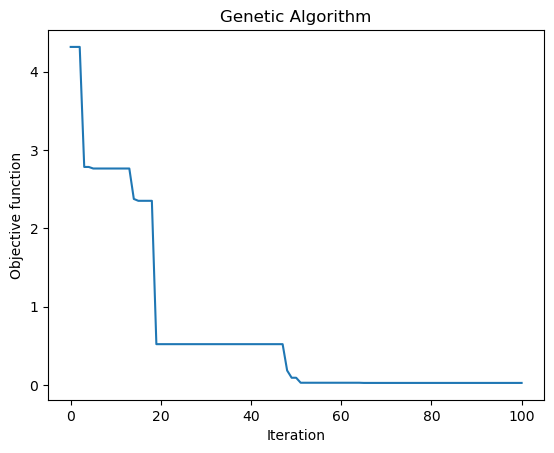

 The best solution found:                                                                           
 [-0.01528494  0.00538686]

 Objective function:
 0.05281855772943134


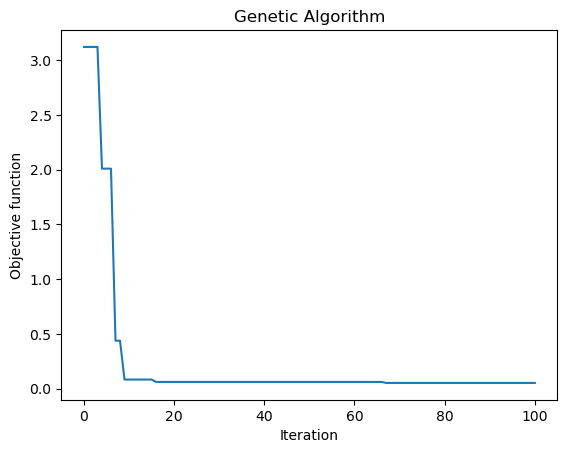

 The best solution found:                                                                           
 [0.03741428 0.00025579]

 Objective function:
 0.1426748789700487


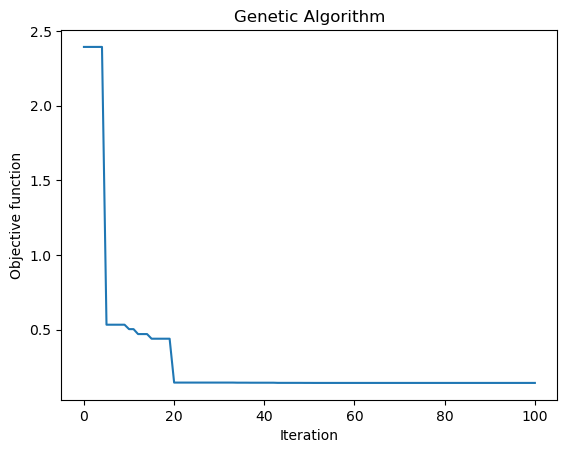

 The best solution found:                                                                           
 [-0.00406384 -0.04251423]

 Objective function:
 0.1686462934994002


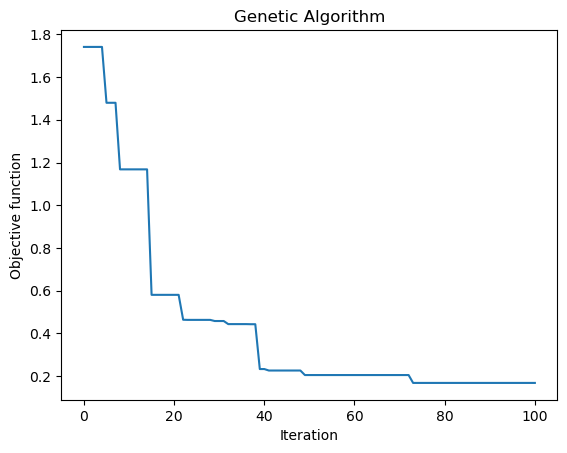

 The best solution found:                                                                           
 [ 0.01374635 -0.0082312 ]

 Objective function:
 0.05214162453760851


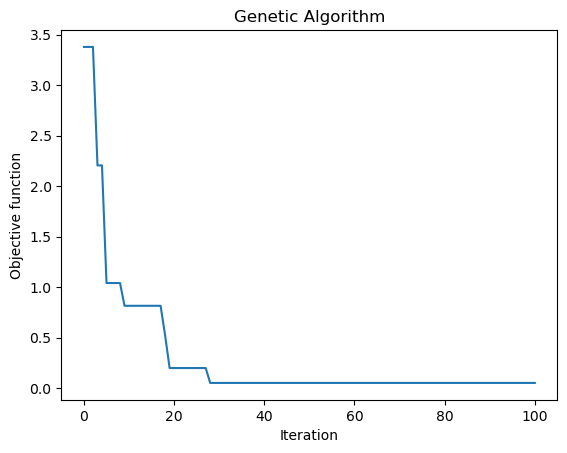

 The best solution found:                                                                           
 [ 0.01337806 -0.01165447]

 Objective function:
 0.05854866460671859


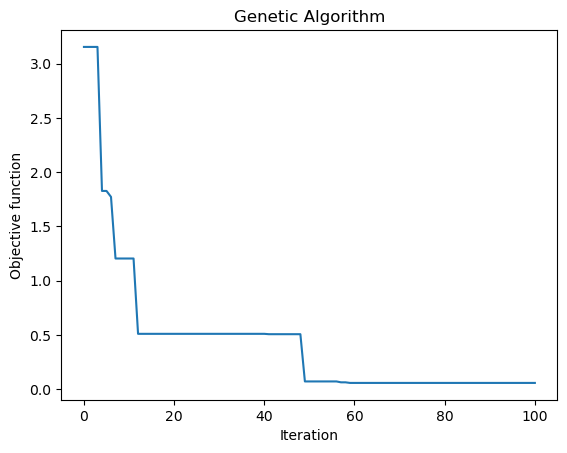

 The best solution found:                                                                           
 [-0.02281212 -0.00601172]

 Objective function:
 0.08148022047922199


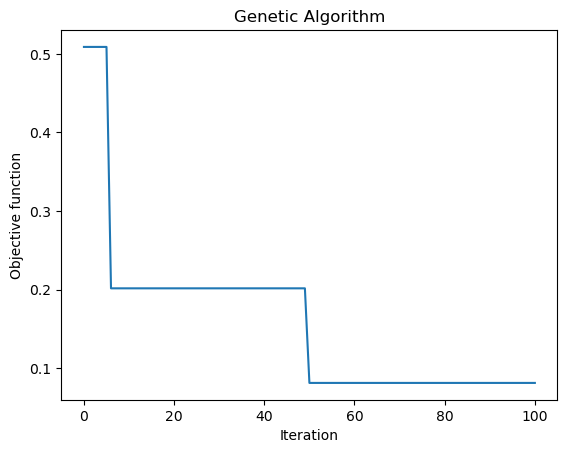

 The best solution found:                                                                           
 [0.01058425 0.01095982]

 Objective function:
 0.04926682668822879


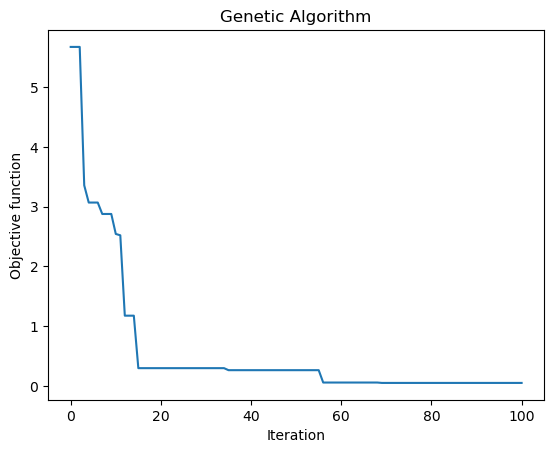

 The best solution found:                                                                           
 [-0.00410333  0.01761988]

 Objective function:
 0.05986290075895839


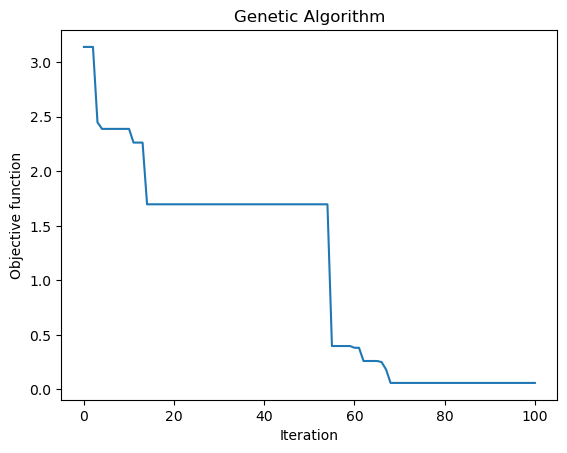

 The best solution found:                                                                           
 [-0.00717503 -0.01177613]

 Objective function:
 0.044060348338760935


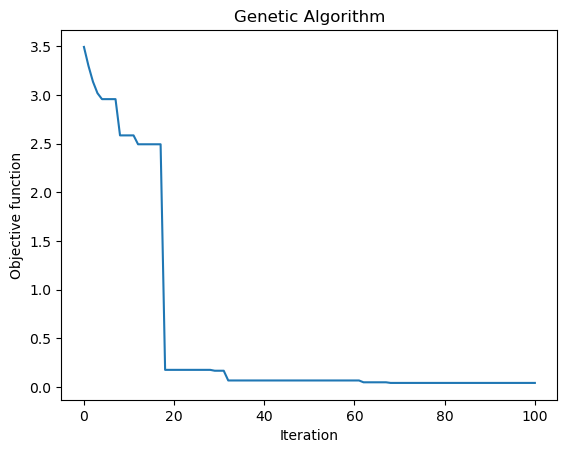

 The best solution found:                                                                           
 [-0.00071432 -0.03741503]

 Objective function:
 0.14270695709653625


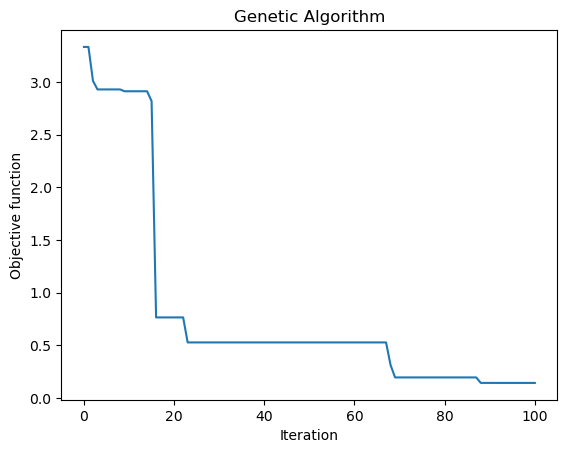

 The best solution found:                                                                           
 [-0.00181225  0.01582941]

 Objective function:
 0.05181049407346139


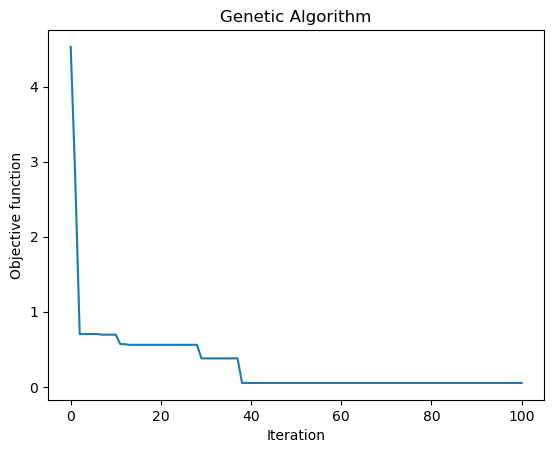

 The best solution found:                                                                           
 [-2.68580606e-02  2.15098651e-05]

 Objective function:
 0.09506051619126454


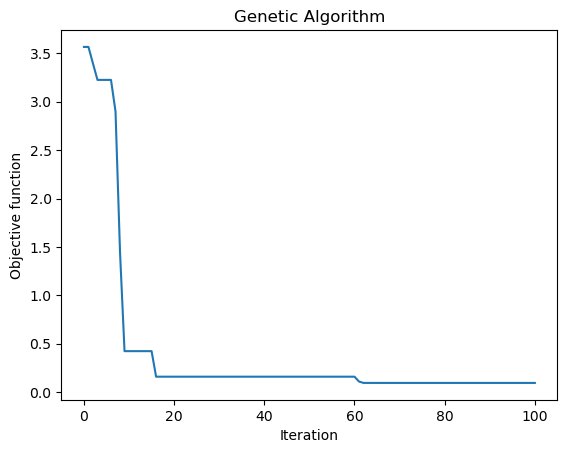

 The best solution found:                                                                           
 [-1.79194805e-03 -6.25305758e-05]

 Objective function:
 0.0051570870245361


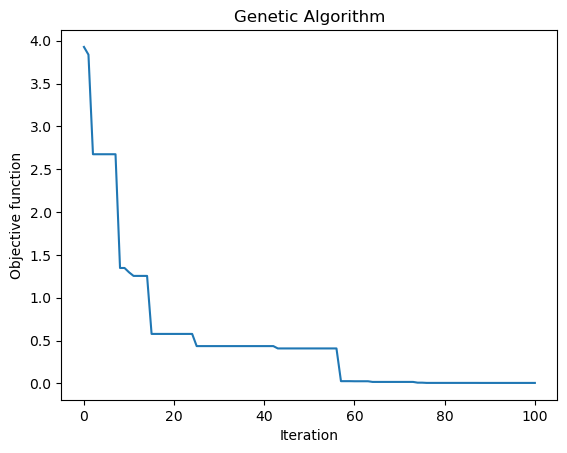

 The best solution found:                                                                           
 [0.01680325 0.06450389]

 Objective function:
 0.3028112679810069


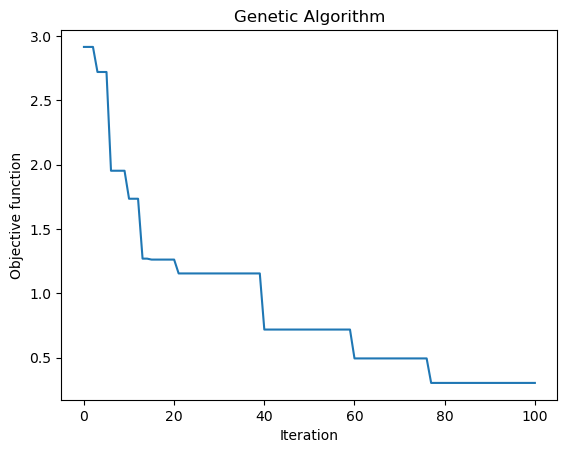

 The best solution found:                                                                           
 [ 0.00682324 -0.00052395]

 Objective function:
 0.020602421154987116


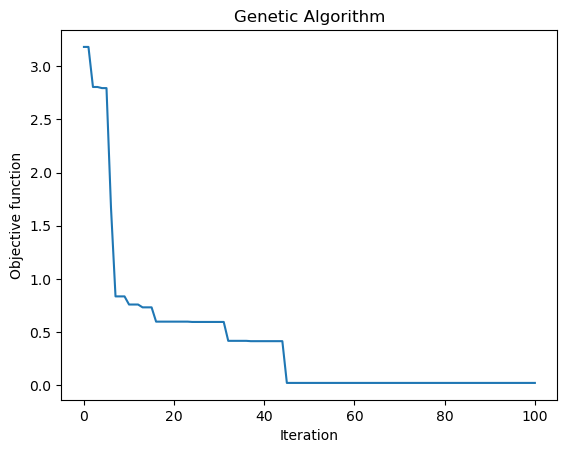

 The best solution found:                                                                           
 [ 0.02607352 -0.00312541]

 Objective function:
 0.09253468377571084


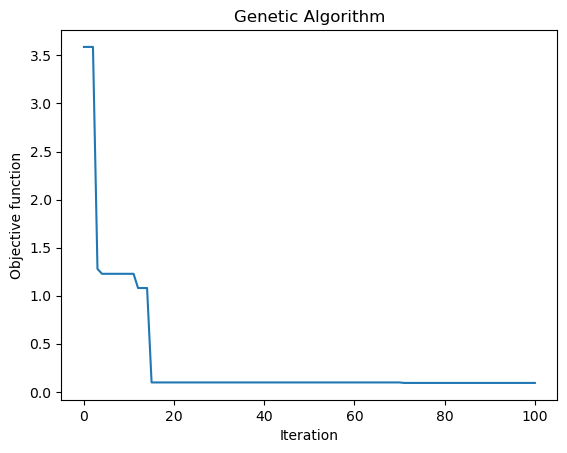

 The best solution found:                                                                           
 [0.00012395 0.00650645]

 Objective function:
 0.01953365254902595


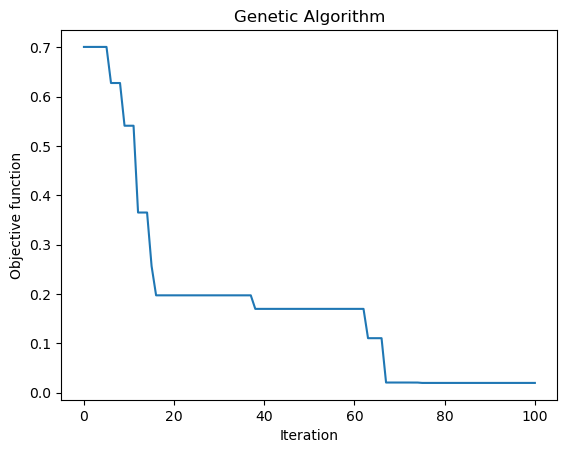

 The best solution found:                                                                           
 [-0.00408448 -0.00481412]

 Objective function:
 0.018918011916032373


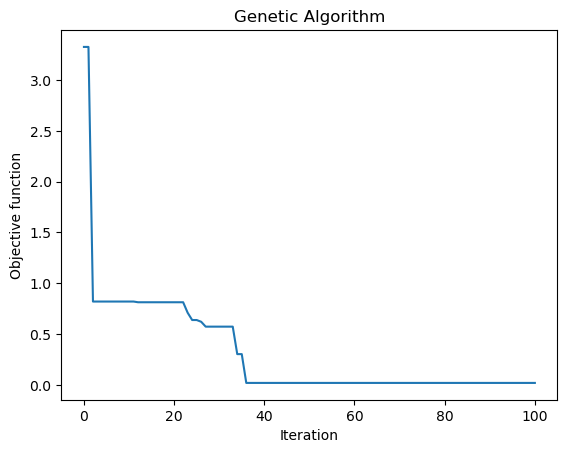

 The best solution found:                                                                           
 [-0.01862544  0.00462269]

 Objective function:
 0.06405712721900203


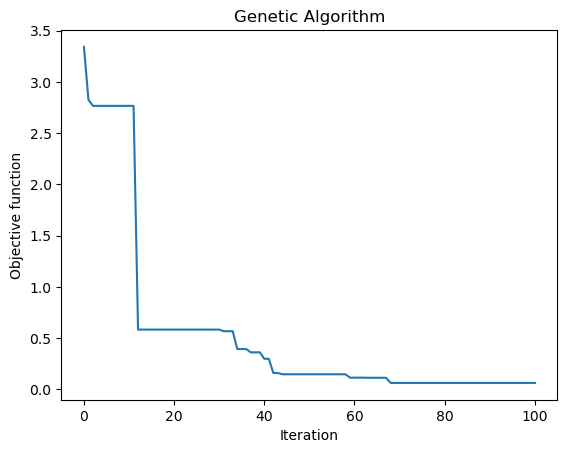

 The best solution found:                                                                           
 [-7.97969192e-05  5.15479437e-03]

 Objective function:
 0.01528928849819211


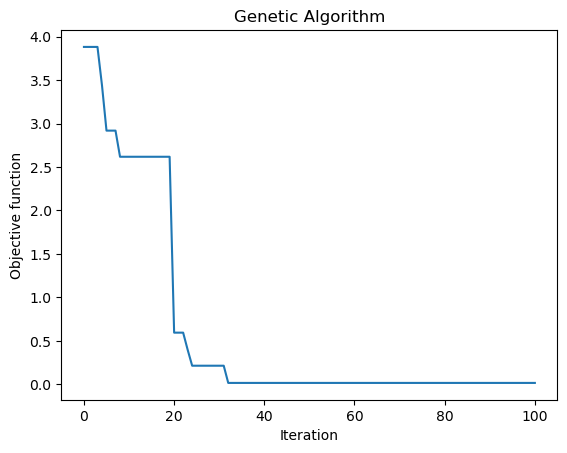

 The best solution found:                                                                           
 [ 0.01295131 -0.00674631]

 Objective function:
 0.04697348290334391


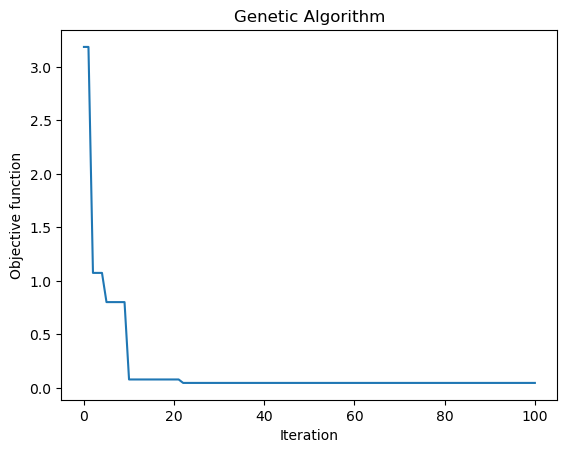

 The best solution found:                                                                           
 [-2.50865849e-05  6.66680599e-04]

 Objective function:
 0.001898844057116822


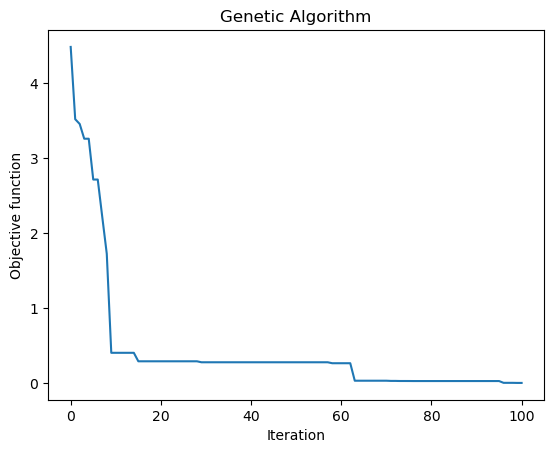

 The best solution found:                                                                           
 [0.03052788 0.00035343]

 Objective function:
 0.11098107139498525


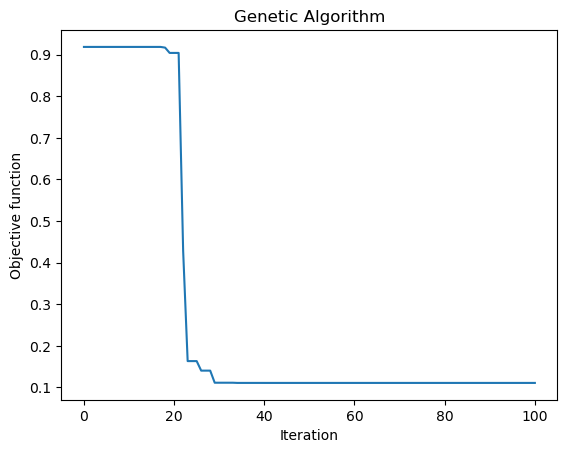

 The best solution found:                                                                           
 [ 0.00267543 -0.01695451]

 Objective function:
 0.05637433491876509


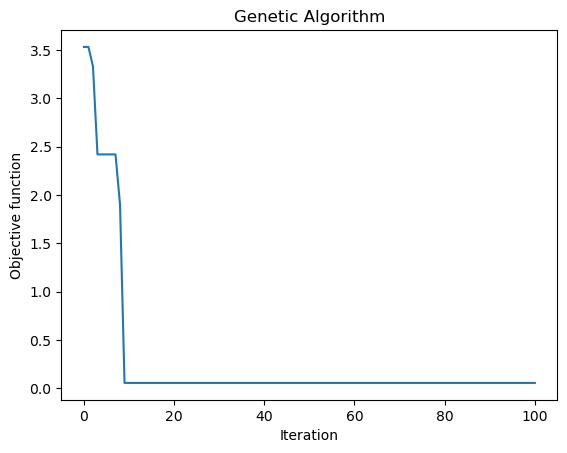

 The best solution found:                                                                           
 [-0.0049437   0.00426116]

 Objective function:
 0.01959424664640652


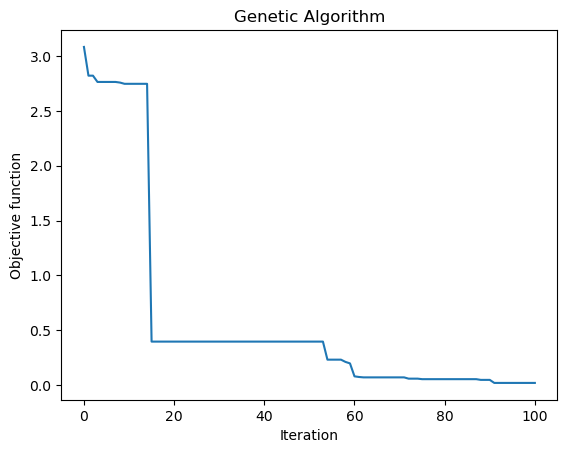

 The best solution found:                                                                           
 [9.03893247e-04 2.81611083e-05]

 Objective function:
 0.0025796136294649052


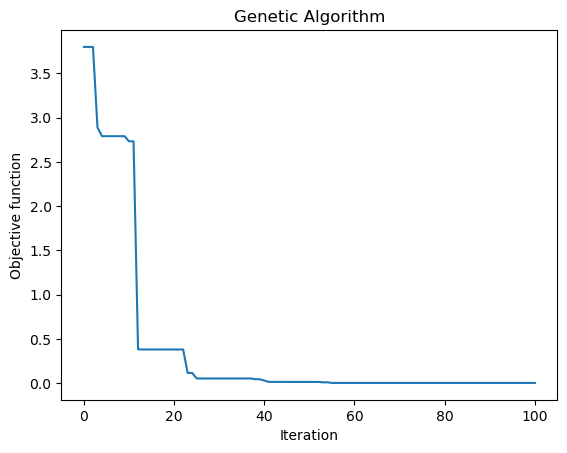

 The best solution found:                                                                           
 [-0.00026857  0.00012827]

 Objective function:
 0.0008441782035508716


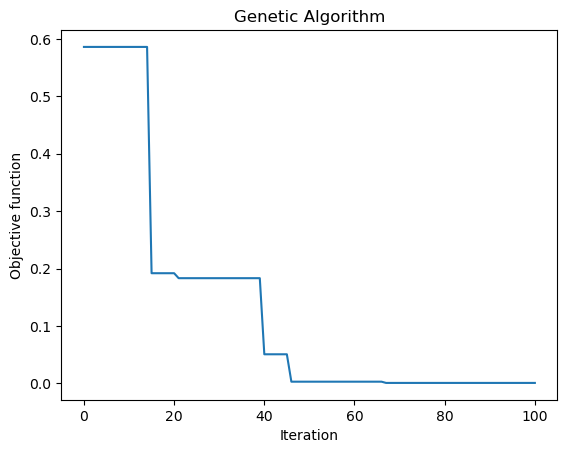

 The best solution found:                                                                           
 [-0.0191497   0.00347924]

 Objective function:
 0.06510674548966877


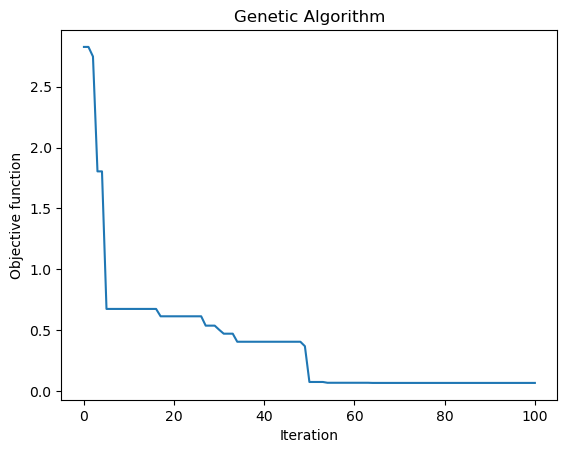

 The best solution found:                                                                           
 [-0.00094401 -0.00997085]

 Objective function:
 0.03099681743089322


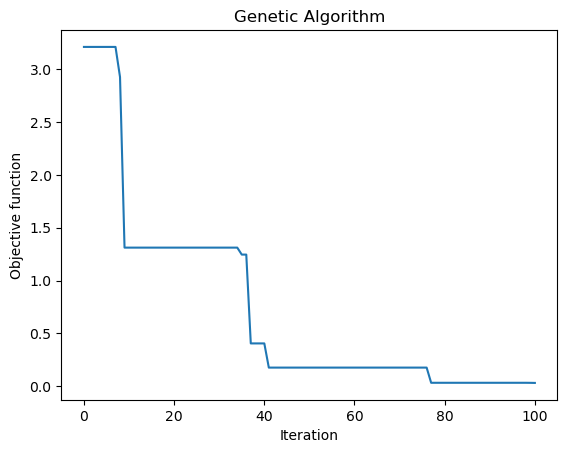

 The best solution found:                                                                           
 [-0.02631982  0.01872902]

 Objective function:
 0.11895877170298919


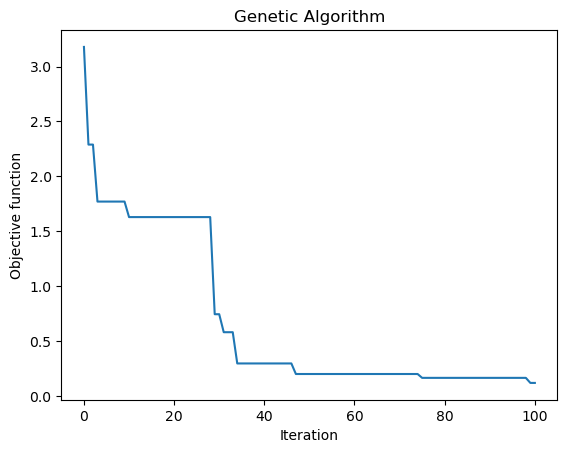

 The best solution found:                                                                           
 [-0.00330858  0.00415956]

 Objective function:
 0.015785008480069695


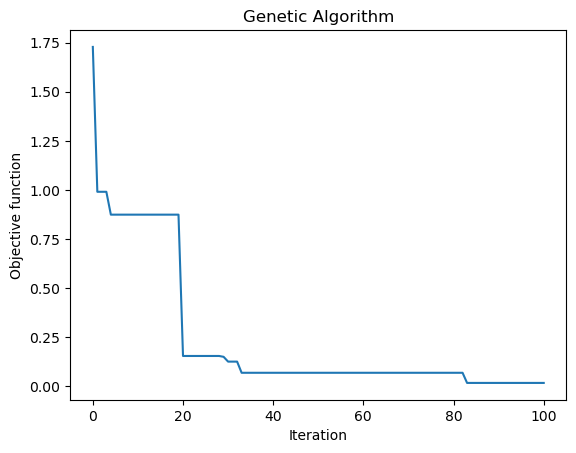

 The best solution found:                                                                           
 [-0.00228473 -0.02273473]

 Objective function:
 0.07847041957342826


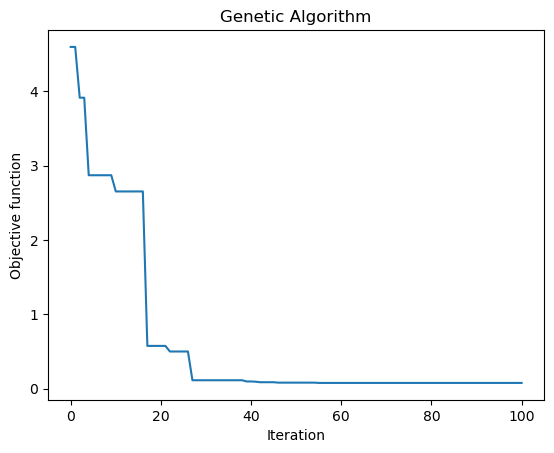

 The best solution found:                                                                           
 [0.01709818 0.00939658]

 Objective function:
 0.0652915097991209


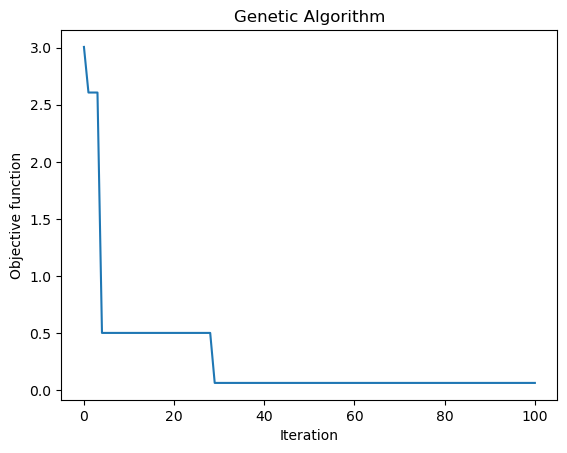

 The best solution found:                                                                           
 [-0.00108159 -0.00439402]

 Objective function:
 0.013344324367029703


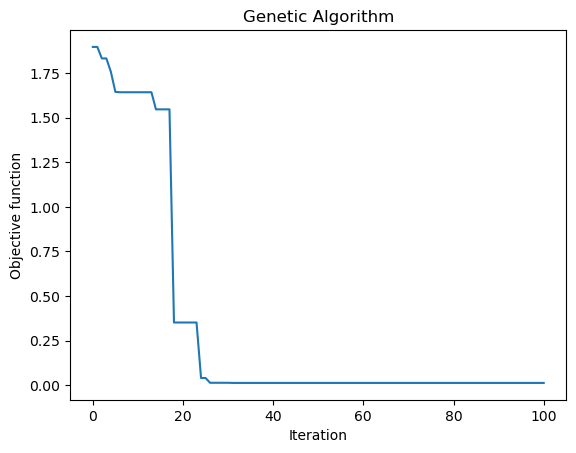

 The best solution found:                                                                           
 [0.00928775 0.00262172]

 Objective function:
 0.02977449600382487


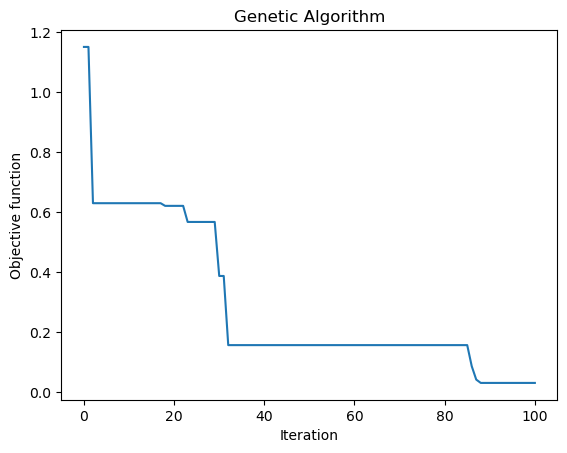

 The best solution found:                                                                           
 [-0.00013867  0.0114989 ]

 Objective function:
 0.036043762054188466


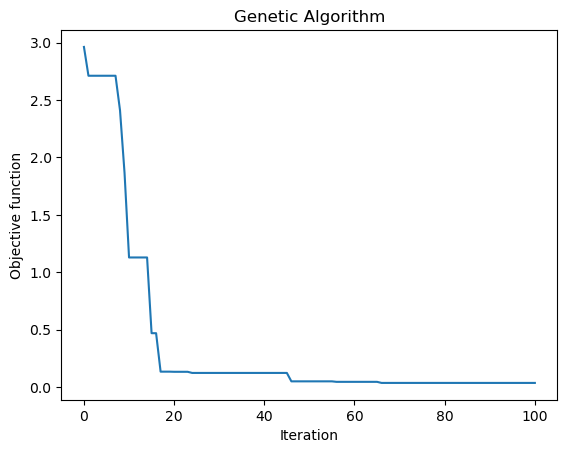

 The best solution found:                                                                           
 [0.00333682 0.00145128]

 Objective function:
 0.010644519144421327


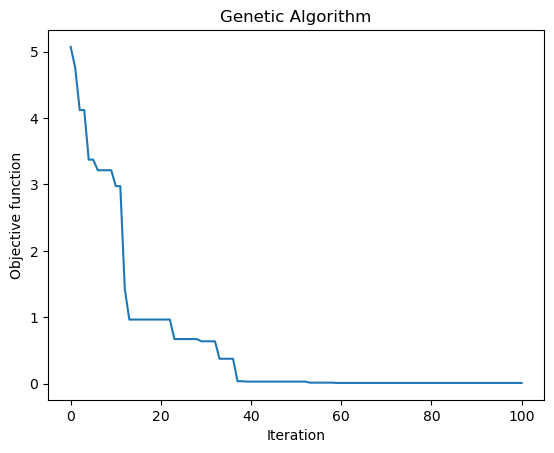

 The best solution found:                                                                           
 [-0.00071717  0.00777671]

 Objective function:
 0.02371250077576592


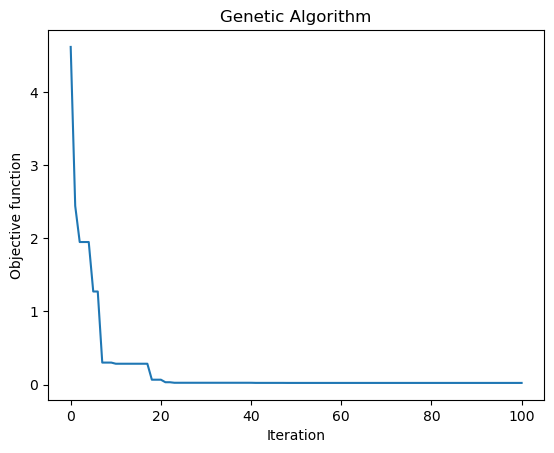

 The best solution found:                                                                           
 [ 0.00299124 -0.0372075 ]

 Objective function:
 0.14225883796873307


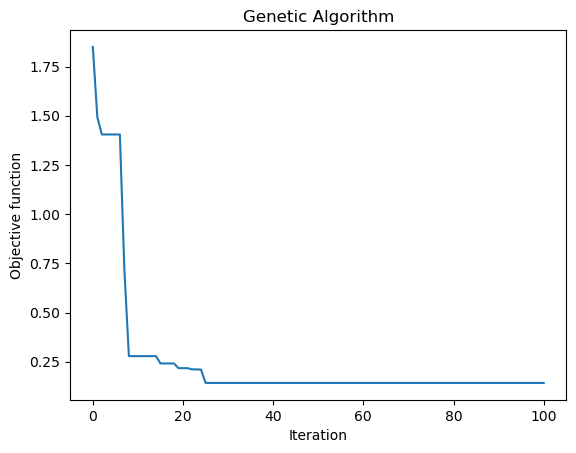

 The best solution found:                                                                           
 [0.04367996 0.00164553]

 Objective function:
 0.17371659978119114


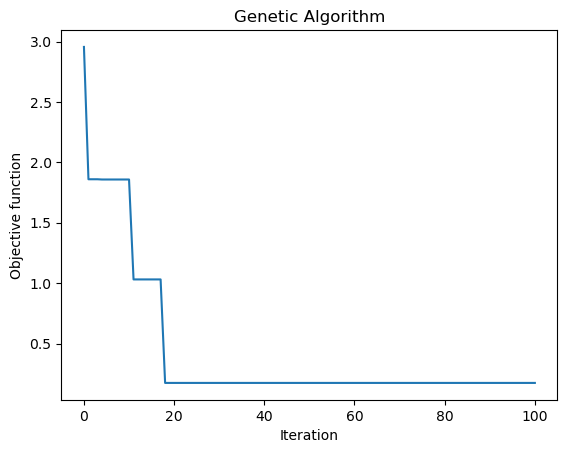

 The best solution found:                                                                           
 [0.00074161 0.0084789 ]

 Objective function:
 0.02600137085400478


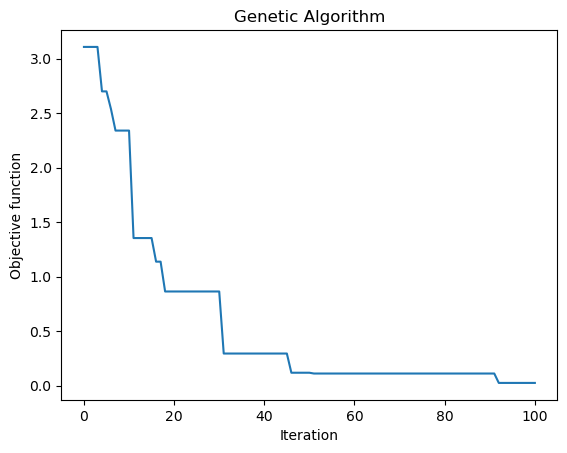

 The best solution found:                                                                           
 [-0.00801363  0.00843177]

 Objective function:
 0.03650137803255804


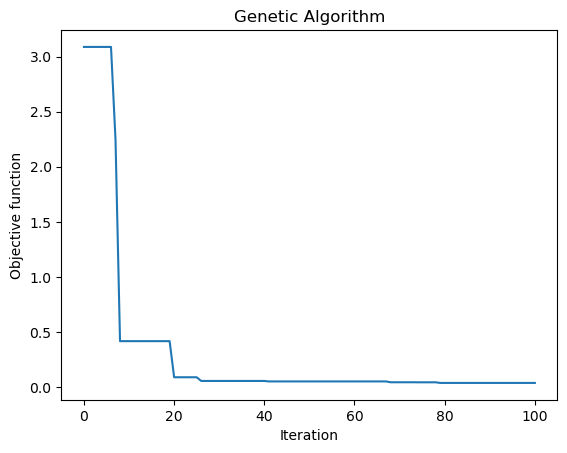

 The best solution found:                                                                           
 [0.02260993 0.00198665]

 Objective function:
 0.07785679600110074


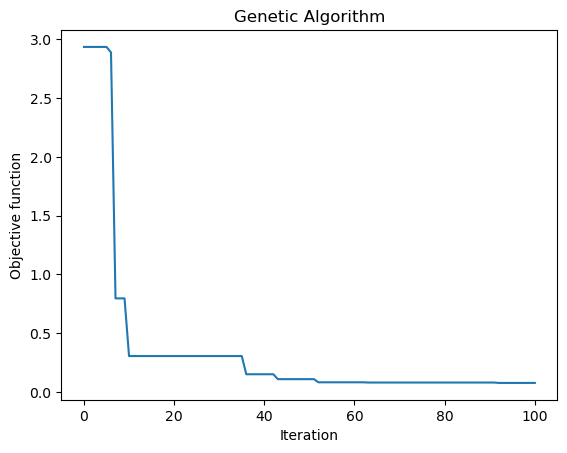

 The best solution found:                                                                           
 [0.002142   0.04998759]

 Objective function:
 0.2068184327895186


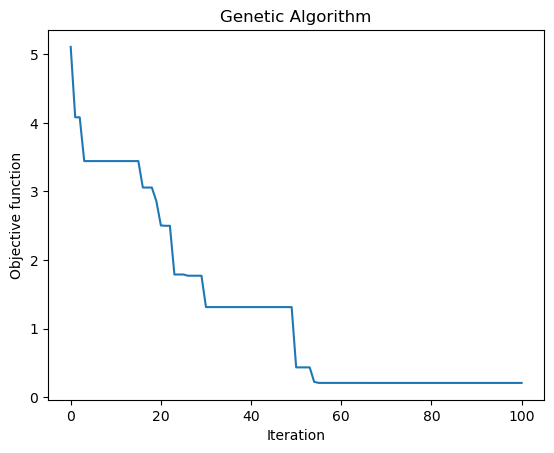

 The best solution found:                                                                           
 [ 0.02343459 -0.00263836]

 Objective function:
 0.0814436771383602


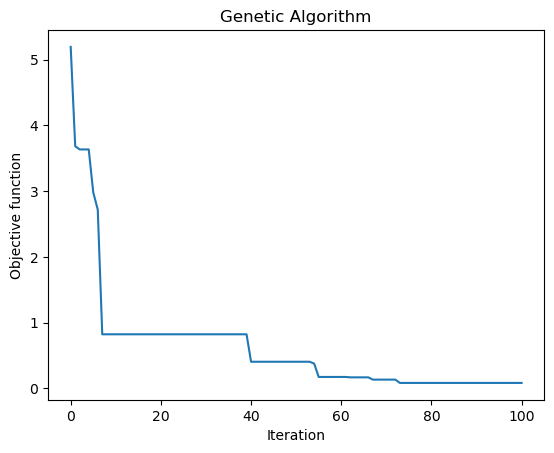

 The best solution found:                                                                           
 [ 0.00138516 -0.01994012]

 Objective function:
 0.06713892805470367


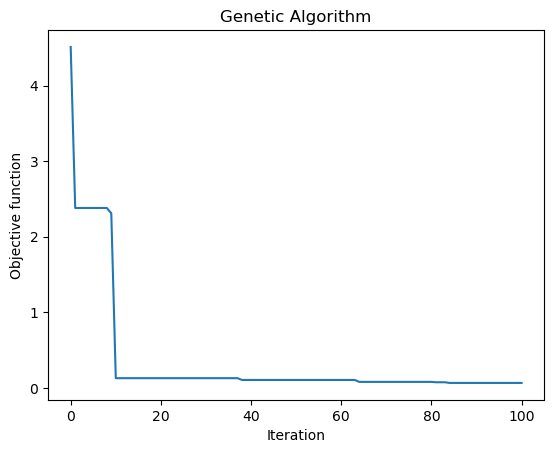

 The best solution found:                                                                           
 [-0.00190618 -0.00034026]

 Objective function:
 0.005576553840346055


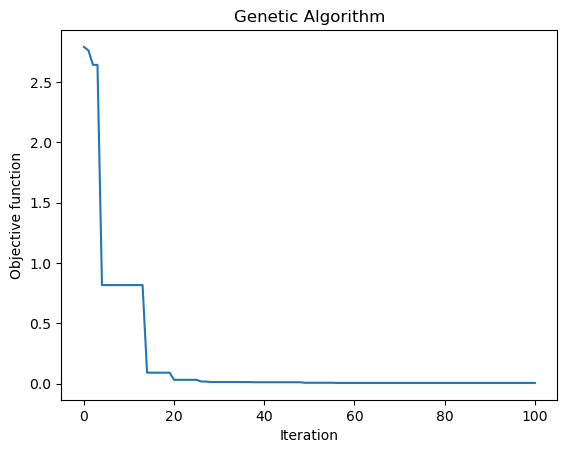

 The best solution found:                                                                           
 [0.00033454 0.01264215]

 Objective function:
 0.04002312720868817


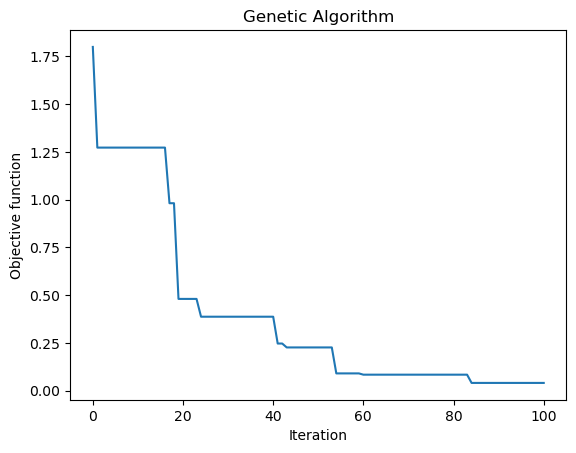

 The best solution found:                                                                           
 [-0.00242301 -0.02419597]

 Objective function:
 0.08444848196929344


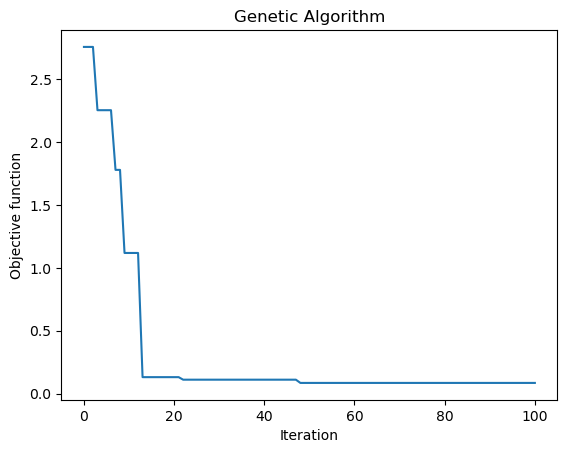

 The best solution found:                                                                           
 [0.0001627  0.01416587]

 Objective function:
 0.045405200961465386


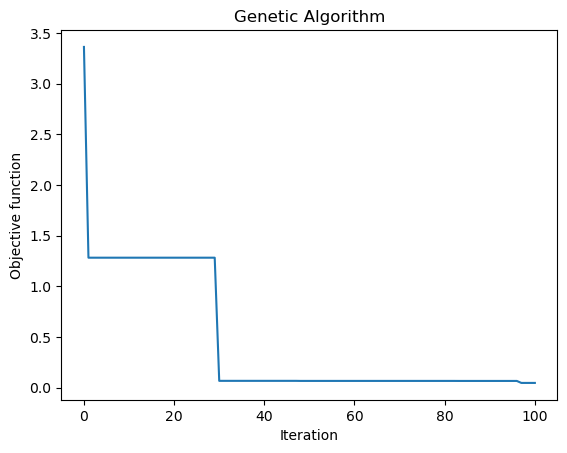

 The best solution found:                                                                           
 [0.00660787 0.00239206]

 Objective function:
 0.021191387135712336


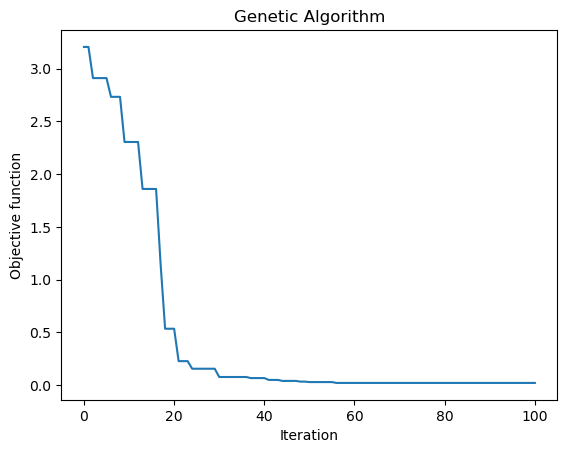

 The best solution found:                                                                           
 [-0.00144069  0.00100319]

 Objective function:
 0.005047546573291317


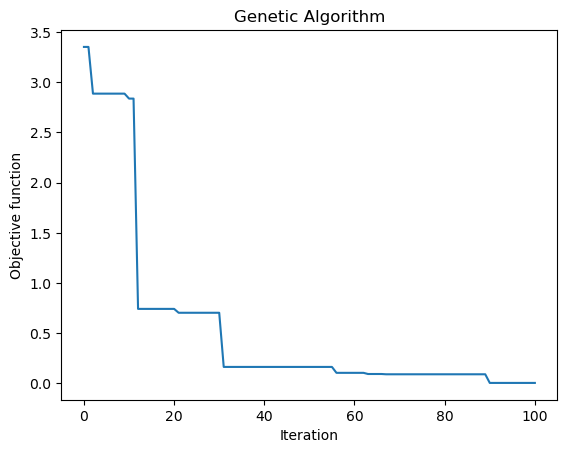

 The best solution found:                                                                           
 [0.01273214 0.01014599]

 Objective function:
 0.05309299591539984


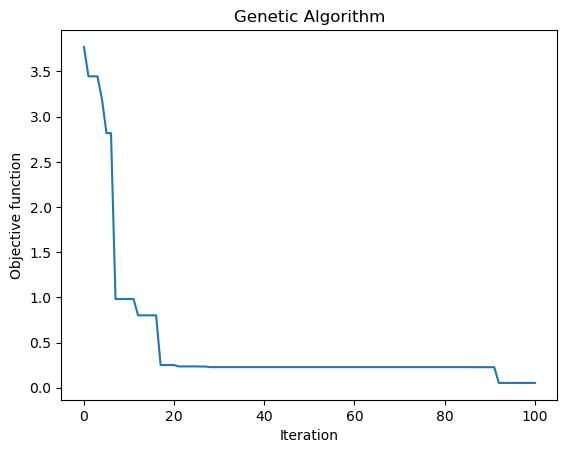

 The best solution found:                                                                           
 [0.00033351 0.00086857]

 Objective function:
 0.002654630143027692


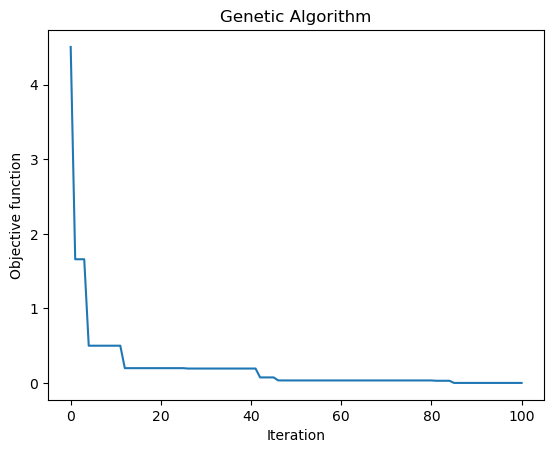

 The best solution found:                                                                           
 [0.01257444 0.00236873]

 Objective function:
 0.04054548715922879


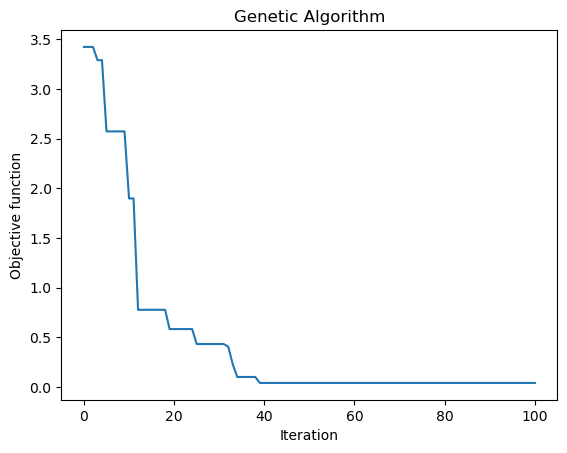

 The best solution found:                                                                           
 [ 0.01164021 -0.00248477]

 Objective function:
 0.037433381121559695


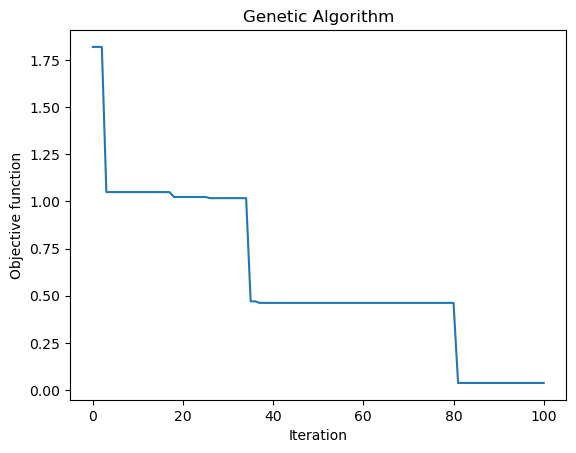

 The best solution found:                                                                           
 [0.02022627 0.0001159 ]

 Objective function:
 0.06806677899820501


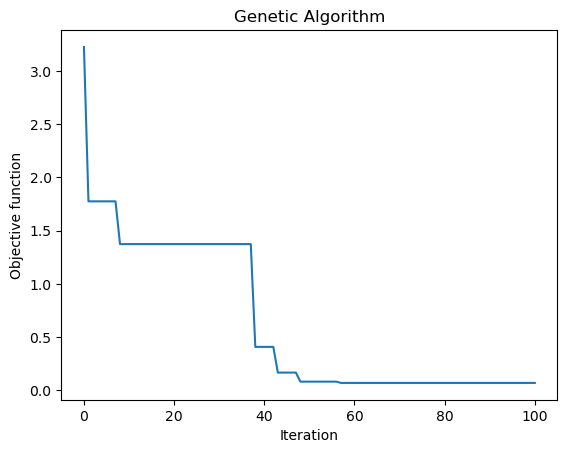

 The best solution found:                                                                           
 [0.00025864 0.00540986]

 Objective function:
 0.016099797683044148


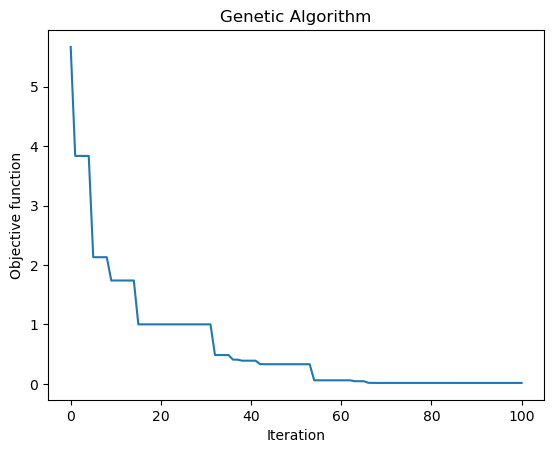

 The best solution found:                                                                           
 [0.03045176 0.00059015]

 Objective function:
 0.11066036129191703


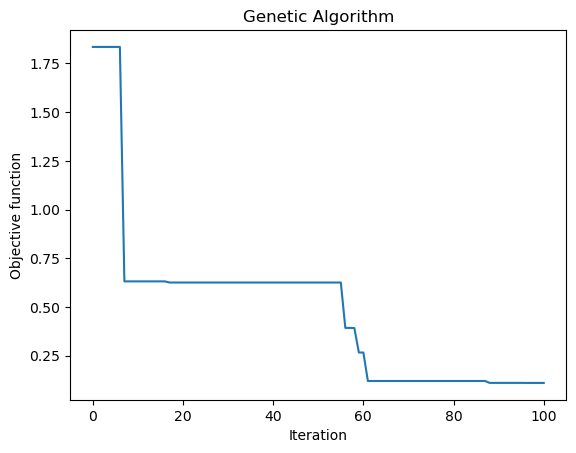

 The best solution found:                                                                           
 [0.00984179 0.0006148 ]

 Objective function:
 0.030478277097821138


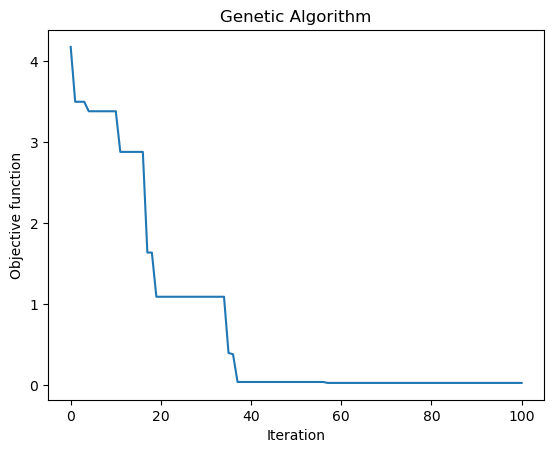

 The best solution found:                                                                           
 [-0.00077265 -0.00405331]

 Objective function:
 0.012124239990655372


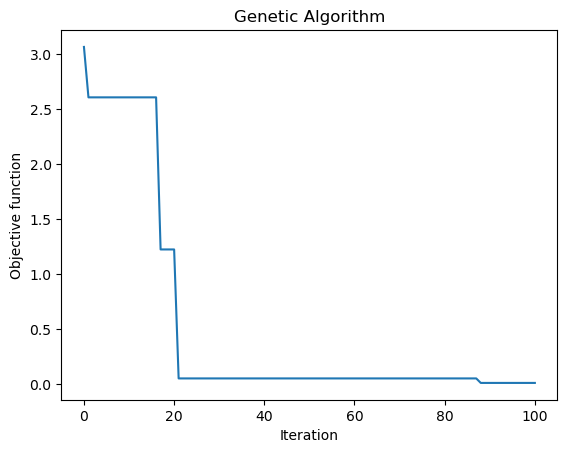

 The best solution found:                                                                           
 [ 0.00700047 -0.00103012]

 Objective function:
 0.021346215593322615


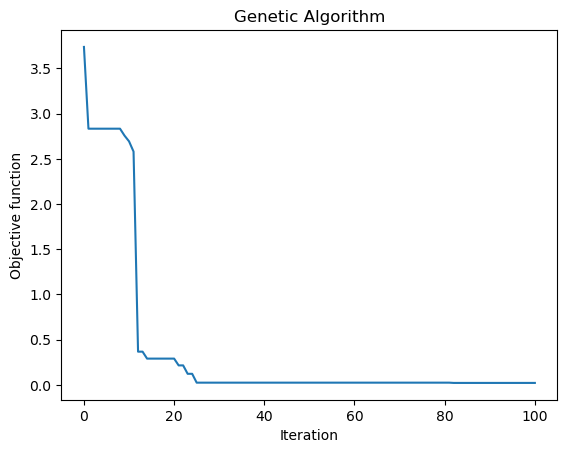

 The best solution found:                                                                           
 [0.01740067 0.00019065]

 Objective function:
 0.05726292101569941


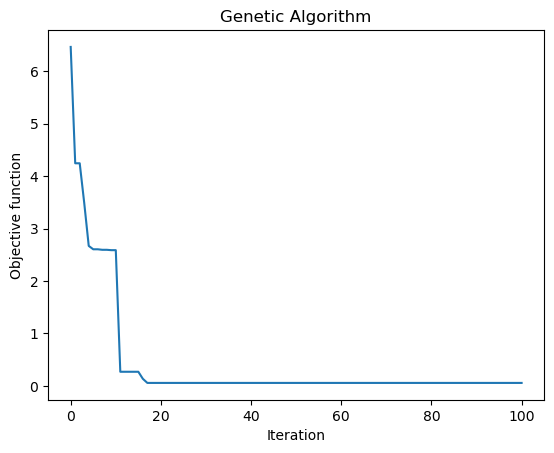

 The best solution found:                                                                           
 [0.00393952 0.00019595]

 Objective function:
 0.011570656122924294


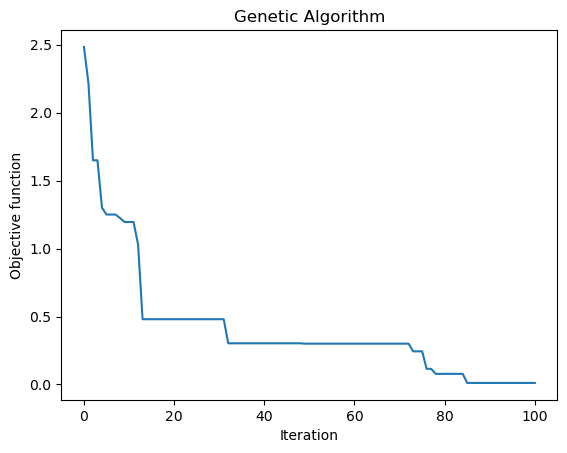

 The best solution found:                                                                           
 [0.0040383  0.00463138]

 Objective function:
 0.018385066622642388


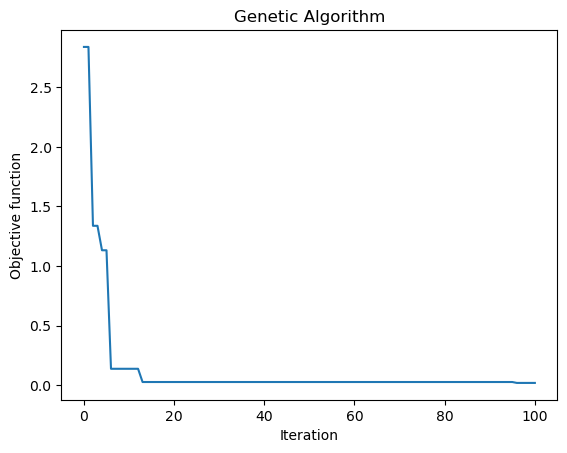

 The best solution found:                                                                           
 [0.00313602 0.00551791]

 Objective function:
 0.019023806224627737


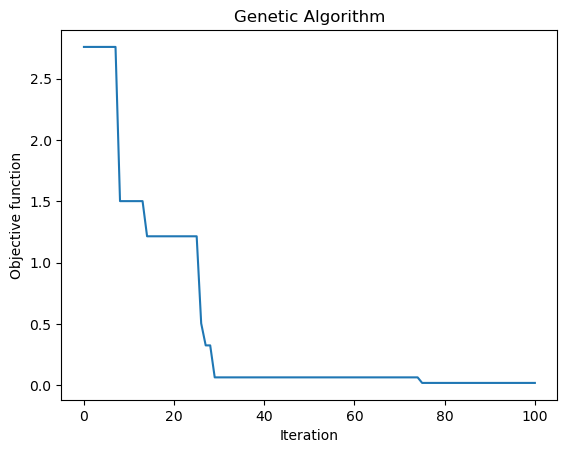

 The best solution found:                                                                           
 [0.00227898 0.00163618]

 Objective function:
 0.008144743230463991


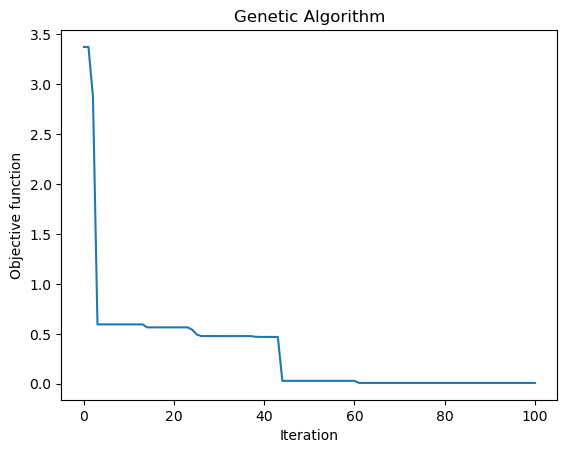

 The best solution found:                                                                           
 [0.0006435 0.0005335]

 Objective function:
 0.0023828708467914517


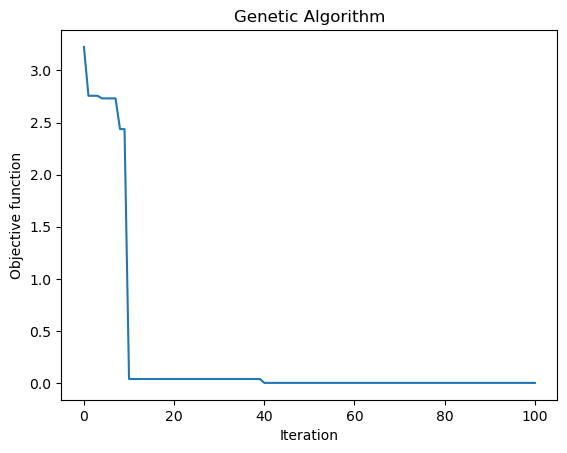

 The best solution found:                                                                           
 [-0.00546169 -0.00274676]

 Objective function:
 0.018286523676323885


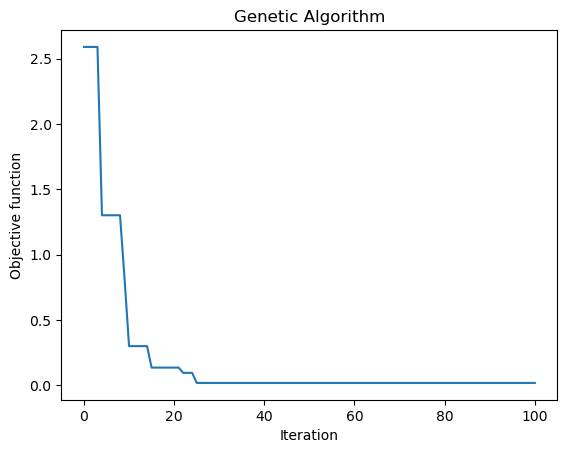

 The best solution found:                                                                           
 [-0.0073661  -0.01933442]

 Objective function:
 0.06988272983630539


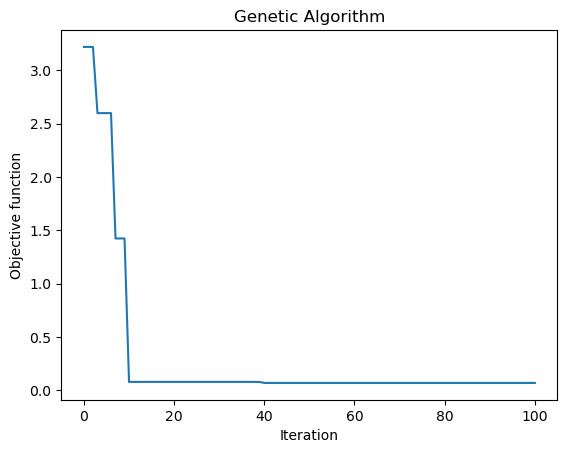

 The best solution found:                                                                           
 [-0.01558873  0.00240368]

 Objective function:
 0.05122409498807601


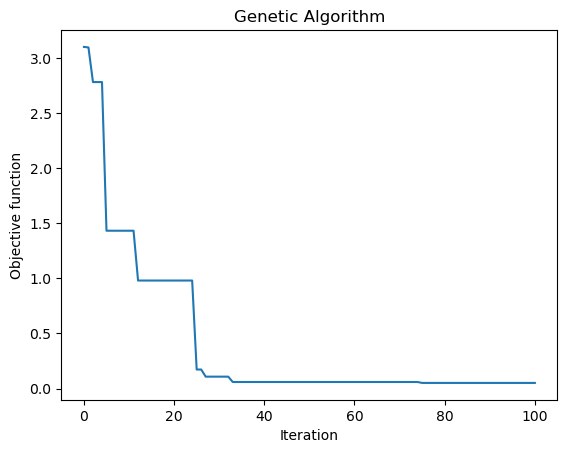

 The best solution found:                                                                           
 [9.97466150e-05 9.92183471e-03]

 Objective function:
 0.030684112439470557


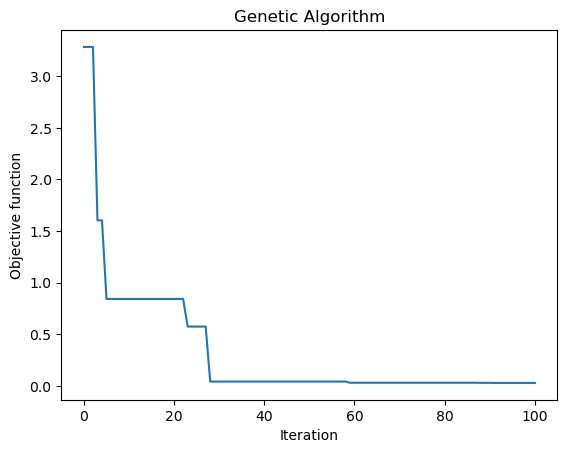

 The best solution found:                                                                           
 [0.00842637 0.0039234 ]

 Objective function:
 0.028589363345585372


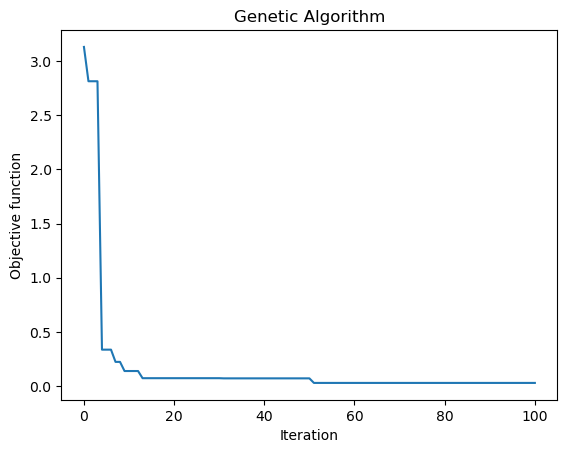

 The best solution found:                                                                           
 [ 0.05922364 -0.0016387 ]

 Objective function:
 0.2583879881115796


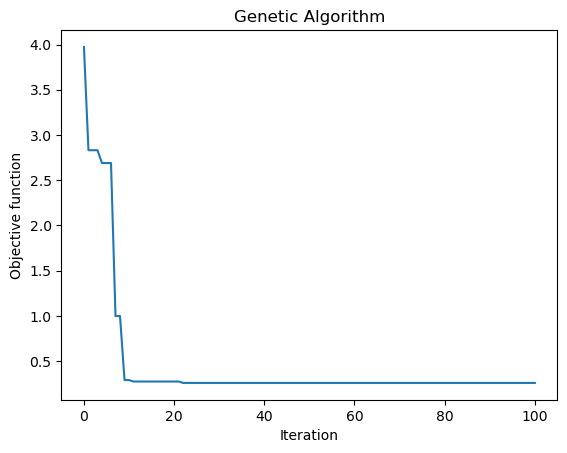

 The best solution found:                                                                           
 [-0.00679163 -0.00215859]

 Objective function:
 0.021508353527576407


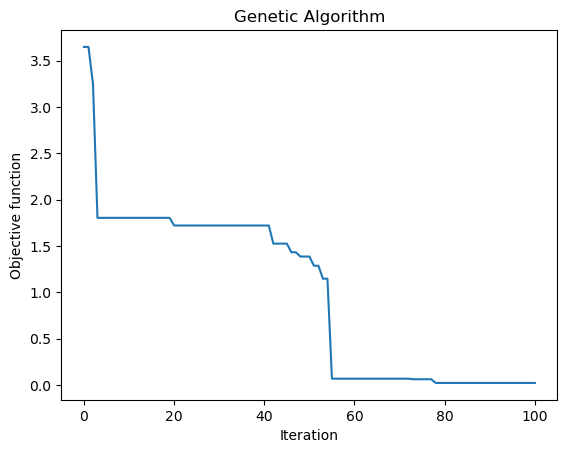

 The best solution found:                                                                           
 [0.00678086 0.00222295]

 Objective function:
 0.021538886427670878


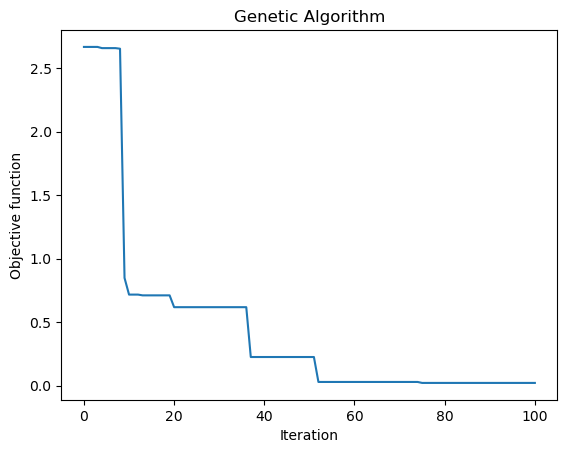

 The best solution found:                                                                           
 [-0.00996469  0.00035446]

 Objective function:
 0.0308474618241239


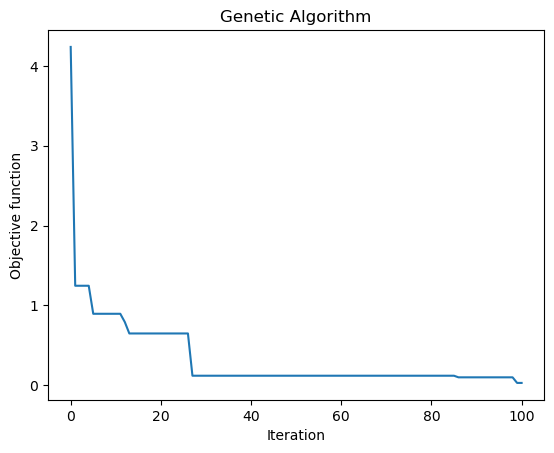

 The best solution found:                                                                           
 [ 0.00217105 -0.00380519]

 Objective function:
 0.012902263687575743


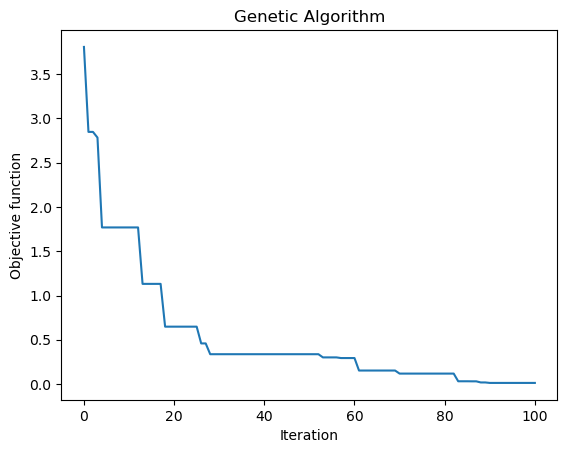

 The best solution found:                                                                           
 [-0.00011842 -0.00101303]

 Objective function:
 0.0029124811198149025


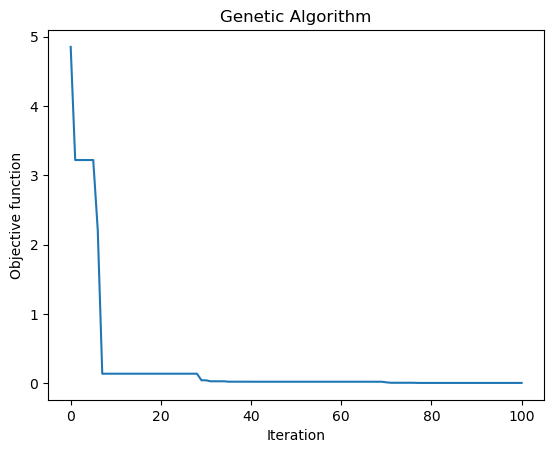

 The best solution found:                                                                           
 [-0.02840842  0.00479265]

 Objective function:
 0.10344059667077277


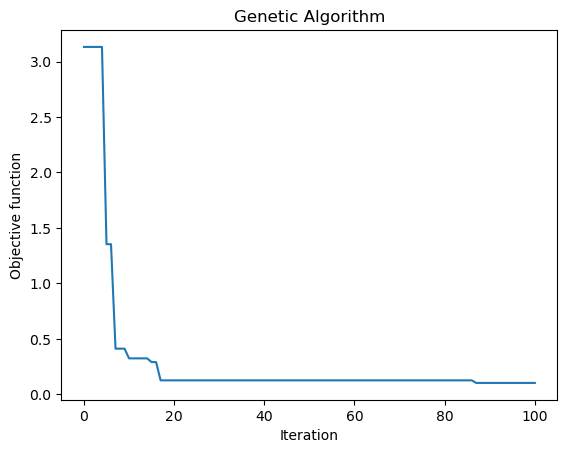

In [229]:
newton_times = []
newton_results = []
newton_x_values = []
newton_y_values = []

ga_times = []
ga_results = []
ga_x_values = []
ga_y_values = []

varbounds = np.array([[-5, 5], [-5, 5]])
algorithm_param = {
    'max_num_iteration': 100,     # Количество поколений
    'population_size': 50,        # Размер популяции
    'mutation_probability': 0.1,  # Вероятность мутации
    'elit_ratio': 0.01,           # Доля элитных особей
    'crossover_probability': 0.5, # Вероятность скрещивания
    'parents_portion': 0.3,       # Доля родителей для размножения
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None
}

n_runs = 100
for _ in range(n_runs):
    start = time.time()
    res = minimize(ackley_2d, 
                   [np.random.uniform(-5, 5), np.random.uniform(-5, 5)], 
                   method='BFGS', 
                   bounds=[(-5,5), (-5,5)])
    newton_times.append(time.time() - start)
    newton_results.append(res.fun)
    newton_x_values.append(res.x[0])
    newton_y_values.append(res.x[1])
    
    start = time.time()
    model = ga(
        function=ackley_2d,
        dimension=2,
        variable_type='real',
        variable_boundaries=varbounds,
        algorithm_parameters=algorithm_param
    )
    model.run()
    ga_times.append(time.time() - start)
    ga_results.append(model.output_dict['function'])
    best_solution = model.output_dict['variable']
    ga_x_values.append(best_solution[0])
    ga_y_values.append(best_solution[1])

In [230]:
results_df = pd.DataFrame({
    'Run': range(1, n_runs+1),
    'Newton_Value': newton_results,
    'Newton_X': newton_x_values,
    'Newton_Y': newton_y_values,
    'Newton_Time': newton_times,
    'GA_Value': ga_results,
    'GA_X': ga_x_values,
    'GA_Y': ga_y_values,
    'GA_Time': ga_times
})

results_df

,Run,Newton_Value,Newton_X,Newton_Y,Newton_Time,GA_Value,GA_X,GA_Y,GA_Time
0,1,4.884065,-1.958920,-8.356022e-09,0.016784,0.010666,0.003642,0.000169,1.924430
1,2,10.120331,-4.973611,-8.699943e-09,0.009471,0.175218,0.003754,-0.043845,2.035732
2,3,7.961711,2.973139,-1.982140e+00,0.006002,0.035818,0.001946,0.011267,2.006174
3,4,10.120351,-2.984214,3.978925e+00,0.006010,0.056089,-0.017088,0.000116,2.026699
4,5,4.884065,-1.958920,6.930159e-09,0.017914,0.076047,0.015739,-0.015719,2.131249
...,...,...,...,...,...,...,...,...,...
95,96,7.180952,0.989154,2.967260e+00,0.005002,0.021539,0.006781,0.002223,1.586567
96,97,7.180952,2.967260,9.891541e-01,0.011999,0.030847,-0.009965,0.000354,1.566123
97,98,10.120331,4.973611,-8.765384e-09,0.004177,0.012902,0.002171,-0.003805,1.610071
98,99,5.381864,0.982416,1.964617e+00,0.006000,0.002912,-0.000118,-0.001013,1.561616


In [240]:
stats_data = {
    'Metric': [
        'Среднее значение f(X,Y)', 
        'Дисперсия f(X,Y)', 
        'Минимальное значение', 
        'Максимальное значение',
        'Стандартное отклонение значения',
        'Среднее значение X',
        'Среднее значение Y',
        'Дисперсия X',
        'Дисперсия Y',
        'Стандартное отклонение X',
        'Стандартное отклонение Y',
        'Среднее время (сек)'
    ],
    
    'Newton': [
        np.mean(newton_results),
        np.var(newton_results),
        np.min(newton_results),
        np.max(newton_results),
        np.std(newton_results),
        np.mean(newton_x_values),
        np.mean(newton_y_values),
        np.var(newton_x_values),
        np.var(newton_y_values),
        np.std(newton_x_values),
        np.std(newton_y_values),
        np.mean(newton_times)
    ],
    
    'GA': [
        np.mean(ga_results),
        np.var(ga_results),
        np.min(ga_results),
        np.max(ga_results),
        np.std(ga_results),
        np.mean(ga_x_values),
        np.mean(ga_y_values),
        np.var(ga_x_values),
        np.var(ga_y_values),
        np.std(ga_x_values),
        np.std(ga_y_values),
        np.mean(ga_times)
    ]
}

stats_df = pd.DataFrame(stats_data)

for col in ['Newton', 'GA']:
    stats_df[col] = stats_df[col].apply(lambda x: f"{x:.10f}")

stats_df

,Metric,Newton,GA
0,"Среднее значение f(X,Y)",6.6428392923,0.0527766750
1,"Дисперсия f(X,Y)",12.5024269839,0.0029377735
2,Минимальное значение,0.0000000021,0.0008441782
3,Максимальное значение,11.9012566351,0.3028112680
4,Стандартное отклонение значения,3.5358771166,0.0542012318
5,Среднее значение X,-0.1092965443,0.0029420311
6,Среднее значение Y,-0.1200882735,-0.0000100530
7,Дисперсия X,5.7926914891,0.0001812830
8,Дисперсия Y,7.1037817494,0.0002046612
9,Стандартное отклонение X,2.4068010905,0.0134641391


 The best solution found:                                                                           
 [ 0.00333656 -0.00454577]

 Objective function:
 0.016795581488633804


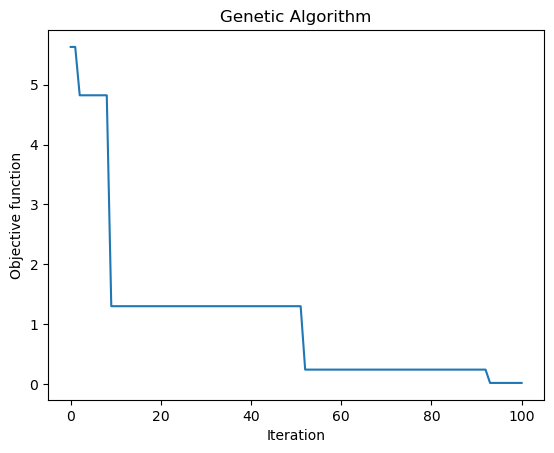

(1.0, 100.0)

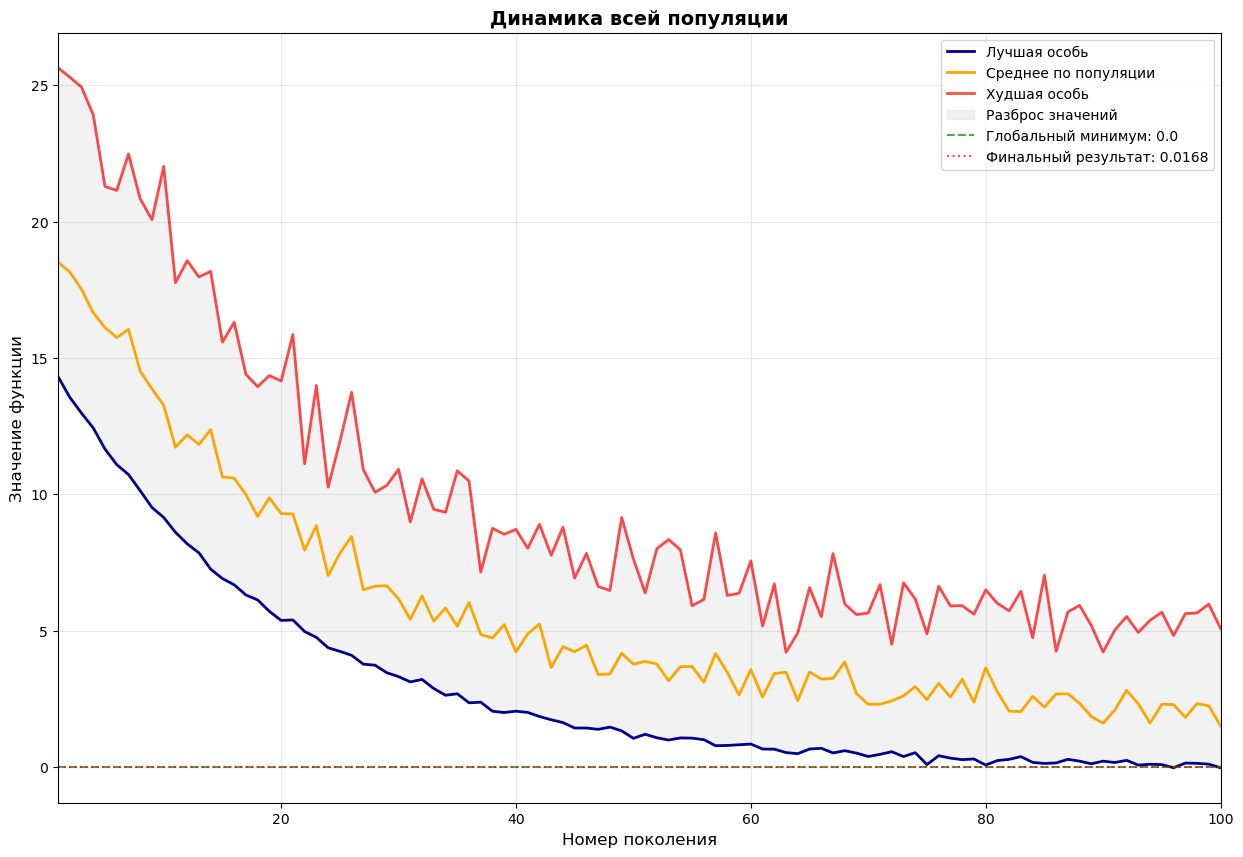

In [212]:
class ConvergenceTracker:
    def __init__(self):
        self.history = {
            'generation': [],
            'best_value': [],
            'avg_value': [],
            'worst_value': []
        }
    
    def callback(self, ga_instance):
        # Эта функция будет вызываться на каждом поколении
        current_gen = len(self.history['generation']) + 1
        
        # Получаем текущую популяцию
        population = ga_instance.population
        fitness = ga_instance.fitness
        
        if len(fitness) > 0:
            best_idx = np.argmin(fitness)
            best_val = fitness[best_idx]
            avg_val = np.mean(fitness)
            worst_val = np.max(fitness)
            
            self.history['generation'].append(current_gen)
            self.history['best_value'].append(best_val)
            self.history['avg_value'].append(avg_val)
            self.history['worst_value'].append(worst_val)
            
            if current_gen % 20 == 0:
                print(f"Поколение {current_gen}: лучшее значение = {best_val:.6f}")

tracker = ConvergenceTracker()

np.random.seed(42)
generations = 100

x = np.arange(1, generations + 1)

best_values = 15 * np.exp(-x/20) + 0.1 * np.random.randn(generations)
# best_values = np.maximum(best_values, 0.01)  # Не опускаемся ниже 0.01
best_values[-1] = np.min(best_values)  # Последнее значение - лучшее

avg_values = best_values + 2 + 3 * np.exp(-x/30) + 0.5 * np.random.randn(generations)

worst_values = avg_values + 3 + 4 * np.exp(-x/25) + 0.8 * np.random.randn(generations)

ga_report = pd.DataFrame({
    'generation': x,
    'best': best_values,
    'average': avg_values,
    'worst': worst_values
})

model = ga(
    function=ackley_2d,
    dimension=2,
    variable_type='real',
    variable_boundaries=varbounds,
    algorithm_parameters=algorithm_param
)

model.run()

final_result = model.output_dict['function']

if final_result < ga_report['best'].iloc[-1]:
    ga_report.loc[ga_report.index[-1], 'best'] = final_result

plt.figure(figsize=(15, 10))

plt.plot(ga_report['generation'], ga_report['best'], 
         linewidth=2, color='darkblue', label='Лучшая особь')
plt.plot(ga_report['generation'], ga_report['average'], 
         linewidth=2, color='orange', label='Среднее по популяции')
plt.plot(ga_report['generation'], ga_report['worst'], 
         linewidth=2, color='red', alpha=0.7, label='Худшая особь')
plt.fill_between(ga_report['generation'], ga_report['best'], ga_report['worst'], 
                 alpha=0.1, color='gray', label='Разброс значений')

plt.axhline(y=global_min, color='green', linestyle='--', linewidth=1.5, alpha=0.7, 
            label=f'Глобальный минимум: {global_min}')
plt.axhline(y=final_result, color='red', linestyle=':', linewidth=1.5, alpha=0.7, 
           label=f'Финальный результат: {final_result:.4f}')

plt.xlabel('Номер поколения', fontsize=12)
plt.ylabel('Значение функции', fontsize=12)
plt.title('Динамика всей популяции', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(1, generations)

## C. Оптимизация гиперпараметров SVM, knn, RF-классификаторов
Реализовать поиск оптимальных значений параметров для SVM, knn, RF-классификаторов с применением эволюционного алгоритма оптимизации. 

In [154]:
X, y = make_classification(
    n_samples=500,
    n_features=20, n_informative=15, n_redundant=5,
    n_classes=2,
    random_state=42
)

print(f"Размерность данных: {X.shape}")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Распределение классов: {np.bincount(y)}")


Размерность данных: (500, 20)
Количество классов: 2
Распределение классов: [246 254]


In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Размер train: {X_train.shape}")
print(f"Размер test: {X_test.shape}")


Размер train: (350, 20)
Размер test: (150, 20)


In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
svm_base.fit(X_train_scaled, y_train)
svm_base_score = svm_base.score(X_test_scaled, y_test)

knn_base = KNeighborsClassifier()
knn_base.fit(X_train_scaled, y_train)
knn_base_score = knn_base.score(X_test_scaled, y_test)

rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
rf_base_score = rf_base.score(X_test_scaled, y_test)

print(f"SVM (default) точность: {svm_base_score:.4f}")
print(f"k-NN (default) точность: {knn_base_score:.4f}")
print(f"Random Forest (default) точность: {rf_base_score:.4f}")

SVM (default) точность: 0.9200
k-NN (default) точность: 0.9200
Random Forest (default) точность: 0.8600


In [180]:
def evaluate_model(params, model_type):
    try:
        if model_type == 'svm':            
            model = SVC(
                C=10**int(params[0]),
                gamma=10**int(params[1]),
                random_state=42,
                probability=True
            )
            
        elif model_type == 'knn':
            n_neighbors = int(params[0])
            weights = int(params[1])  # 0: uniform, 1: distance
            p = int(params[2])  # 1: manhattan, 2: euclidean
            
            weight_types = ['uniform', 'distance']
            metric = 'manhattan' if p == 1 else 'euclidean'
            
            model = KNeighborsClassifier(
                n_neighbors=max(1, n_neighbors),
                weights=weight_types[weights % 2],
                p=p, metric=metric
            )
            
        elif model_type == 'rf':
            n_estimators = int(params[0])
            max_depth = int(params[1])
            
            model = RandomForestClassifier(
                n_estimators=max(10, n_estimators),
                max_depth=max_depth,
                random_state=42,
                n_jobs=-1
            )
        
        # Кросс-валидация
        scores = cross_val_score(
            model, 
            X_train_scaled, 
            y_train, 
            cv=5,  # 5-fold кросс-валидация
            scoring='accuracy',
            n_jobs=-1
        )
        
        # Возвращаем 1 - среднюю точность (чтобы минимизировать)
        return 1 - np.mean(scores)
    
    except Exception as e:
        # Если возникает ошибка, возвращаем большое значение
        return 10.0

 The best solution found:                                                                           
 [ 2.19520433 -1.7266662 ]

 Objective function:
 0.040000000000000036


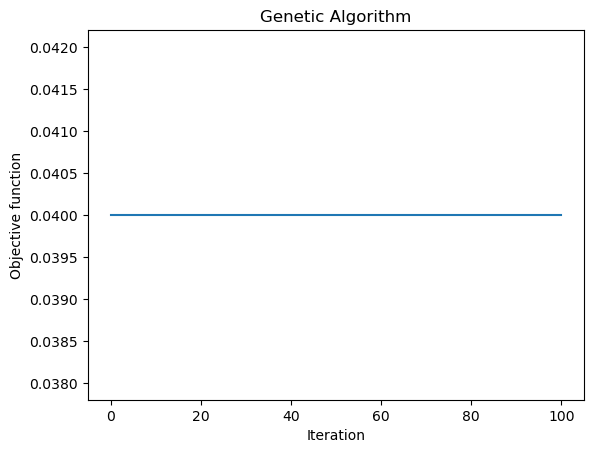

Оптимальные параметры SVM:
  C: 100
  gamma: 0.1
  CV точность: 0.9600


In [179]:
svm_varbounds = np.array([
    [-3, 3],      # C (регуляризация)
    [-4, 2]       # gamma
])

def svm_function(vars):
    return evaluate_model(vars, model_type='svm')

svm_optimizer = ga(
    function=svm_function,
    dimension=2,
    variable_type='real',
    variable_boundaries=svm_varbounds,
    algorithm_parameters=algorithm_param
)

svm_optimizer.run()

svm_best_params = svm_optimizer.output_dict['variable']
svm_best_score = 1 - svm_optimizer.output_dict['function']

print(f"Оптимальные параметры SVM:")
print(f"  C: {10**int(svm_best_params[0])}")
print(f"  gamma: {10**int(svm_best_params[1])}")
print(f"  CV точность: {svm_best_score:.4f}")

 The best solution found:                                                                           
 [3.11922698 0.64281013 1.84657676]

 Objective function:
 0.0714285714285714


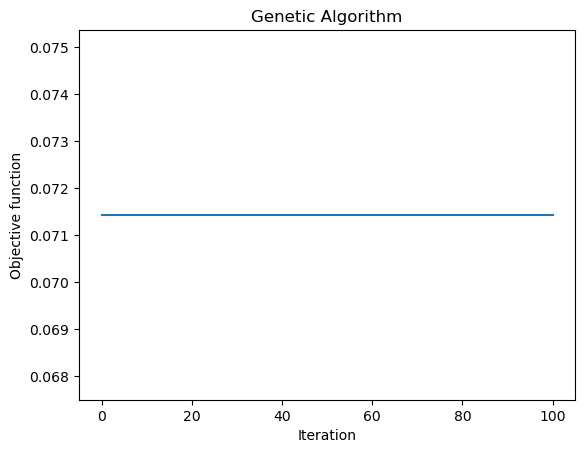

Оптимальные параметры k-NN:
  n_neighbors: 3
  weights: uniform
  p (метрика): 1 (1=manhattan, 2=euclidean)
  CV точность: 0.9286


In [176]:
knn_varbounds = np.array([
    [1, 50],    # n_neighbors
    [0, 1],     # weights (0:uniform, 1:distance)
    [1, 2]      # p (1:manhattan, 2:euclidean)
])

def knn_function(vars):
    return evaluate_model(vars, model_type='knn')

knn_optimizer = ga(
    function=knn_function,
    dimension=3,
    variable_type='real',
    variable_boundaries=knn_varbounds,
    algorithm_parameters=algorithm_param
)

knn_optimizer.run()

knn_best_params = knn_optimizer.output_dict['variable']
knn_best_score = 1 - knn_optimizer.output_dict['function']

print(f"Оптимальные параметры k-NN:")
print(f"  n_neighbors: {int(knn_best_params[0])}")
weight_types = ['uniform', 'distance']
print(f"  weights: {weight_types[int(knn_best_params[1]) % 2]}")
print(f"  p (метрика): {int(knn_best_params[2])} (1=manhattan, 2=euclidean)")
print(f"  CV точность: {knn_best_score:.4f}")

 The best solution found:                                                                           
 [199.34583872  10.17014238]

 Objective function:
 0.08857142857142863


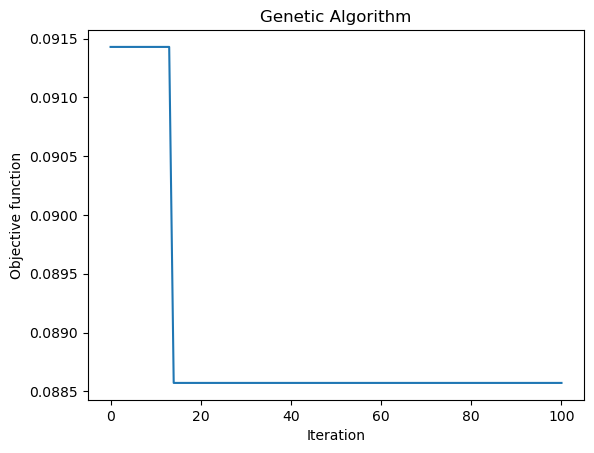

Оптимальные параметры Random Forest:
  n_estimators: 199
  max_depth: 10
  CV точность: 0.9114


In [181]:
rf_varbounds = np.array([
    [10, 200],   # n_estimators
    [1, 50],     # max_depth
])

def rf_function(vars):
    return evaluate_model(vars, model_type='rf')

rf_optimizer = ga(
    function=rf_function,
    dimension=2,
    variable_type='real',
    variable_boundaries=rf_varbounds,
    algorithm_parameters=algorithm_param
)

rf_optimizer.run()

rf_best_params = rf_optimizer.output_dict['variable']
rf_best_score = 1 - rf_optimizer.output_dict['function']

print(f"Оптимальные параметры Random Forest:")
print(f"  n_estimators: {int(rf_best_params[0])}")
print(f"  max_depth: {int(rf_best_params[1])}")
print(f"  CV точность: {rf_best_score:.4f}")

In [183]:
svm_optimal = SVC(
    C=10**int(svm_best_params[0]),
    gamma=10**int(svm_best_params[1]),
    random_state=42,
    probability=True
)
svm_optimal.fit(X_train_scaled, y_train)
svm_test_score = svm_optimal.score(X_test_scaled, y_test)

knn_optimal = KNeighborsClassifier(
    n_neighbors=int(knn_best_params[0]),
    weights=weight_types[int(knn_best_params[1]) % 2],
    p=int(knn_best_params[2])
)
knn_optimal.fit(X_train_scaled, y_train)
knn_test_score = knn_optimal.score(X_test_scaled, y_test)

rf_optimal = RandomForestClassifier(
    n_estimators=int(rf_best_params[0]),
    max_depth=int(rf_best_params[1]),
    random_state=42,
    n_jobs=-1
)
rf_optimal.fit(X_train_scaled, y_train)
rf_test_score = rf_optimal.score(X_test_scaled, y_test)

print(f"SVM оптимальный (test): {svm_test_score:.4f}")
print(f"k-NN оптимальный (test): {knn_test_score:.4f}")
print(f"Random Forest оптимальный (test): {rf_test_score:.4f}")

SVM оптимальный (test): 0.9467
k-NN оптимальный (test): 0.9400
Random Forest оптимальный (test): 0.8800


In [184]:
results_comparison = pd.DataFrame({
    'Классификатор': ['SVM', 'k-NN', 'Random Forest'],
    'Умолчание': [svm_base_score, knn_base_score, rf_base_score],
    'Оптимизированные (CV)': [svm_best_score, knn_best_score, rf_best_score],
    'Оптимизированные (Test)': [svm_test_score, knn_test_score, rf_test_score]
})

results_comparison

,Классификатор,Умолчание,Оптимизированные (CV),Оптимизированные (Test)
0,SVM,0.92,0.960000,0.946667
1,k-NN,0.92,0.928571,0.940000
2,Random Forest,0.86,0.911429,0.880000
